<a href="https://colab.research.google.com/github/obaidsi/Audio-mixer-LTspice/blob/main/AudioMixer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Introduction**

---
This project builds a complete analog audio mixing console as a modular signal chain and validates each stage using LTspice simulation. The work is based on a structured set of lab specifications (Lab 2 → Lab 3 → Lab 4), but it is presented here as an engineering build-and-verify project rather than a lab report.

The goal is to develop practical confidence with:

Op-amp real-world limitations (slew rate and large-signal behavior)

Active analog building blocks used in audio: voltage follower, summing amplifier, integrator (with stabilization), differentiator, and equalizer sections

Frequency-response verification (Bode magnitude/phase) and time-domain verification (transient behavior)

System integration using a block-level approach (subcircuits/hierarchy) and verifying the final end-to-end response

Each stage will be implemented in LTspice, measured with consistent test setups, and documented in this Colab notebook with schematic screenshots + plot screenshots + short engineering notes.*italicized text*



**Final System Diagram**
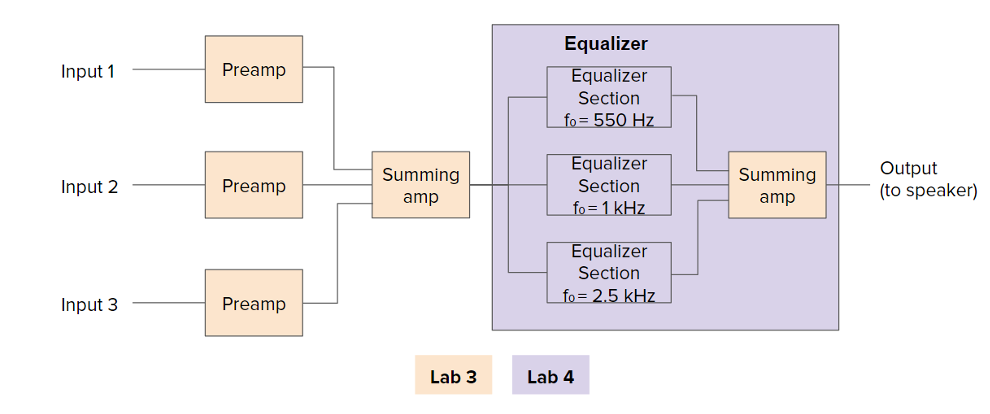

**Phase 0**— Project Setup & Documentation Rules (applies to every step)

Why this matters: keeps your notebook clean and “professional engineering log” style.

Standard simulation settings (use consistently):

Supplies: ±12 V unless the step says otherwise

AC Sweep (audio band): 20 Hz → 20 kHz, log scale (e.g., 100 pts/dec)

Extended sweeps (when required): 1 Hz → 1 MHz or 200 kHz depending on step

Always show:

screenshot of schematic

screenshot of Bode plot (magnitude in dB; phase shown when relevant)

screenshot of transient waveform when requested

Notebook template for each step:

Goal (1–2 lines)

Circuit (LTspice schematic screenshot)

Simulation setup (what analysis + parameters)

Results (plots + cursor measurements)

Notes (3–6 bullets: what you learned / what limitation appears)

#**Procedure 1 – Voltage Follower**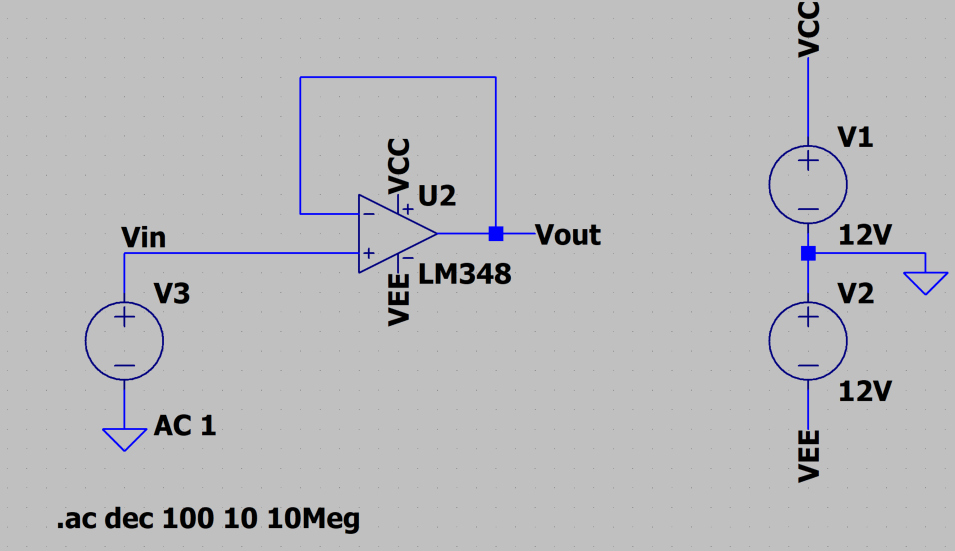

**Analysis 1.1** — Slew Rate (Transient)

Purpose
This simulation measures the op-amp’s slew rate using a voltage follower configuration.
The goal is to verify that the simulated output transition time matches the datasheet slew rate reported in Prelab 2.1.

What is checked

Output rise/fall time after an input transition

Slew rate computed as ΔV/Δt

Agreement with the datasheet value

Note on Rise Time Measurement:
This screenshot shows the measured rise time of the voltage follower circuit. We placed cursors at the 10% and 90% levels of the output transition and found a rise time of approximately 31.88 µs. This corresponds to a slew rate of around 0.56 V/µs, which is very close to the 0.5 V/µs specified in the op-amp datasheet. This confirms that the simulation results align well with the expected real-world performance.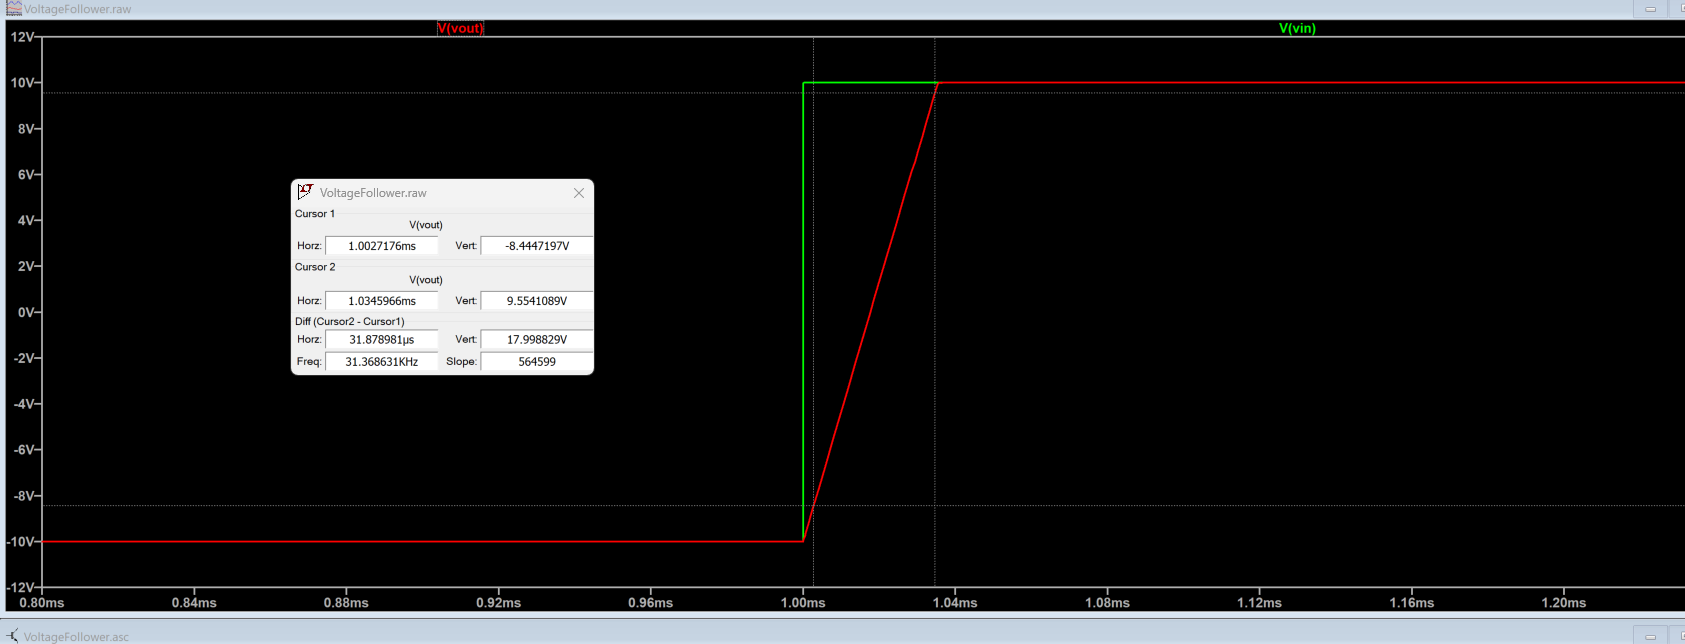

**Analysis1.2:** for Transient Sine Wave Analysis:
In the transient analysis with a 3 V amplitude sine wave, we observed that distortion begins to become noticeable around 30 kHz. By the time the input frequency reaches 40 kHz, the distortion is more pronounced, with the output waveform showing a more noticeable deviation from the input. This matches the expectation that slew-rate limitation begins to impact the output around this frequency range.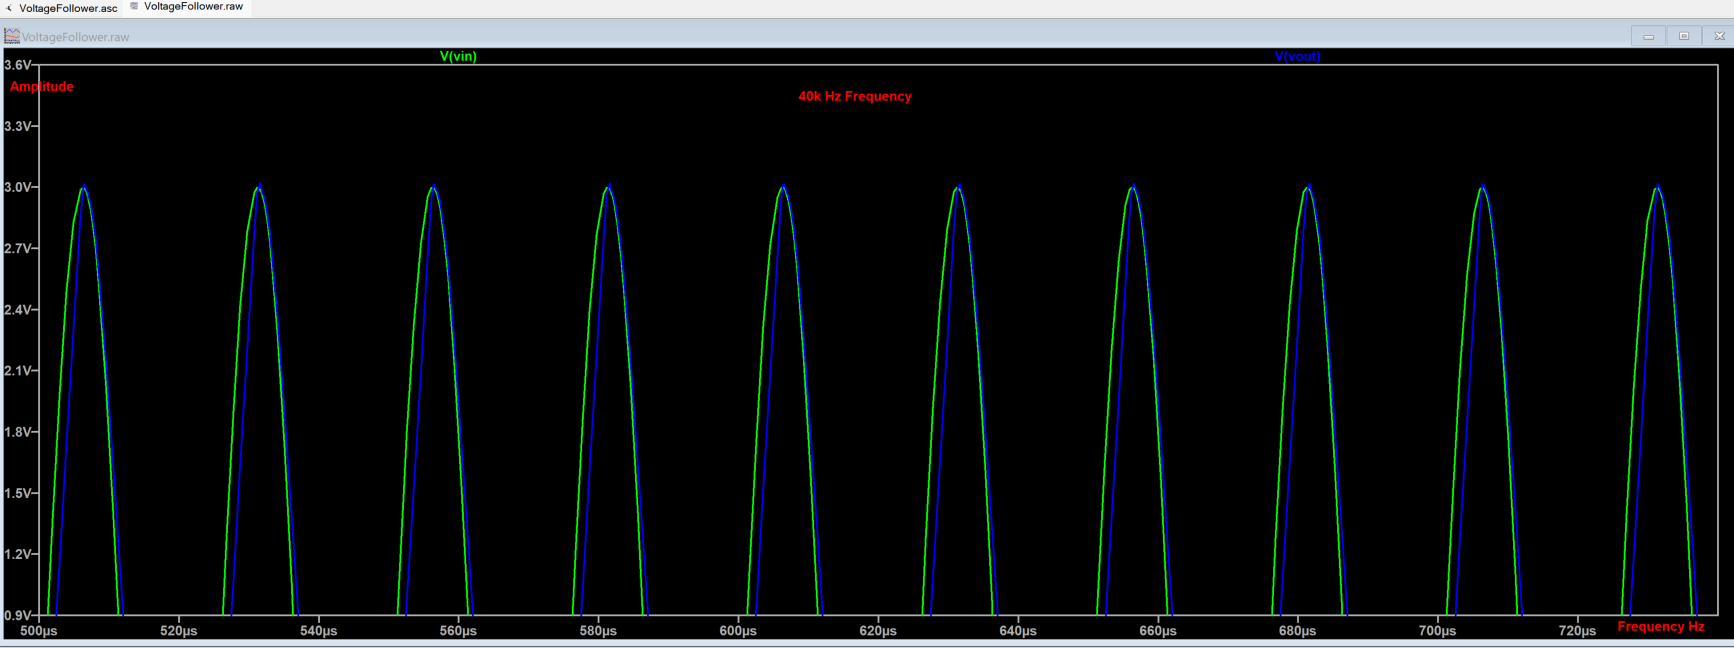

**Analysis 1.3**
According to the LM348N datasheet, the typical unity-gain bandwidth of the op-amp is approximately 1 MHz, which indicates the frequency range over which the voltage follower maintains near-unity small-signal gain. In the AC sweep simulation, the closed-loop gain remains close to 1 up to around this frequency and then begins to roll off. The gain reaches 0.5 (−6 dB) at approximately 2.2 MHz, which occurs beyond the unity-gain bandwidth. This result indicates that the LTspice op-amp macromodel maintains usable gain slightly beyond the typical datasheet value, which is expected since datasheet specifications represent nominal behavior and simulation models may be optimistic..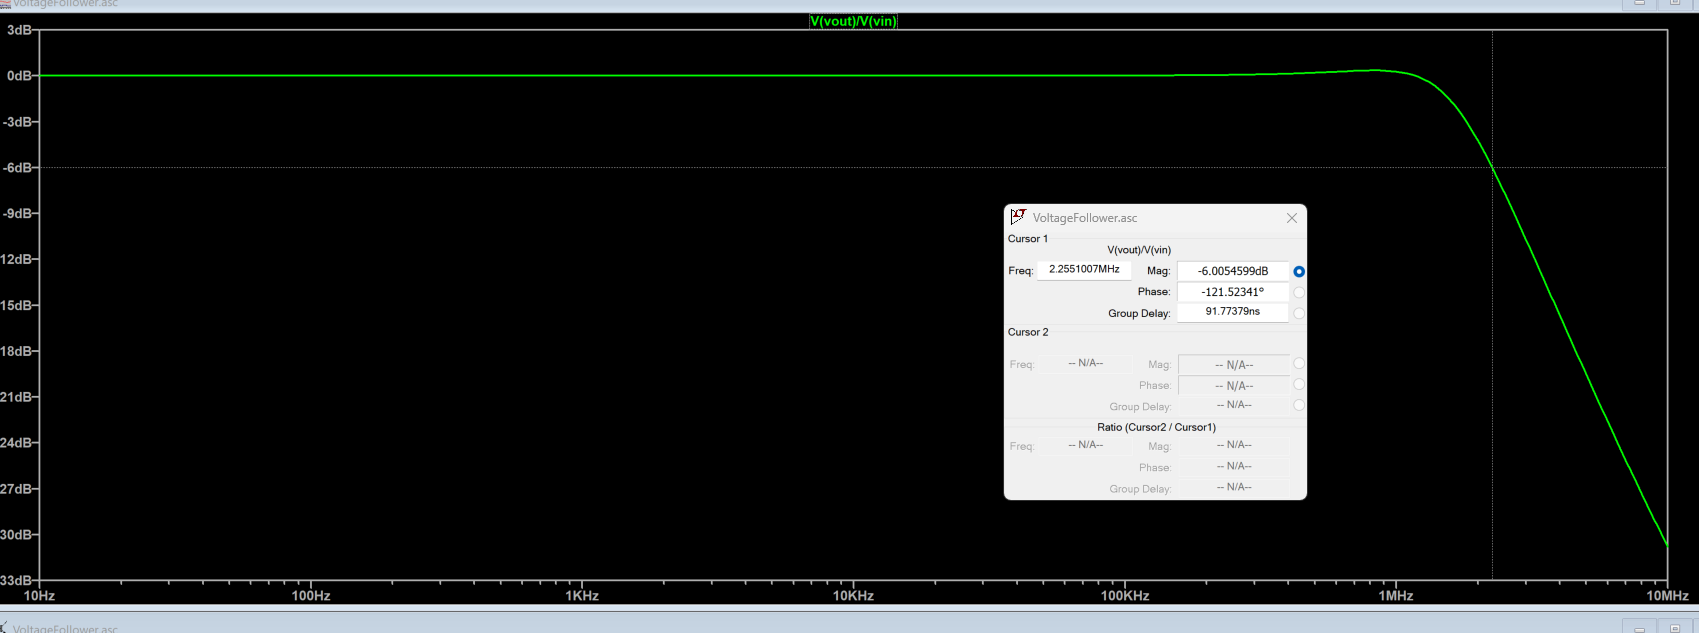

**Summary of Procedure-1 — LM348 Op-Amp Behavior (Voltage Follower)**

From transient and AC analyses of the LM348 configured as a voltage follower, we can characterize both its small-signal and large-signal limitations.

The AC sweep shows that the voltage follower maintains near-unity gain across low and mid frequencies, with gain beginning to roll off near the datasheet unity-gain bandwidth (~1 MHz). Beyond this point, the closed-loop gain gradually decreases, reaching −6 dB at approximately 2.2 MHz. This behavior reflects the finite open-loop gain and bandwidth limitations of the LM348 and is consistent with typical datasheet specifications.

Transient analysis reveals a separate, large-signal limitation caused by the finite slew rate of the op-amp. By measuring the output rise and fall times, the slew rate was estimated to be close to the datasheet value (~0.5 V/µs). When driven with a 3 V amplitude sine wave, the output waveform begins to show noticeable distortion around 30 kHz and becomes more pronounced at higher frequencies. This distortion occurs well below the small-signal bandwidth limit and is caused by the op-amp’s inability to change its output voltage fast enough to track the input.

Together, these results demonstrate that the LM348 exhibits two distinct performance limits:
(1) a small-signal bandwidth limit governed by unity-gain bandwidth, observable in AC analysis, and
(2) a large-signal slew-rate limit that causes time-domain distortion at much lower frequencies, observable only in transient analysis.

This characterization establishes realistic operating bounds for the LM348 and provides the foundation for interpreting its behavior in later summing, filtering, and equalizer circuits.

#**Procedure 2 – Summing Integrator Amplifier (Low Pass Effect)** 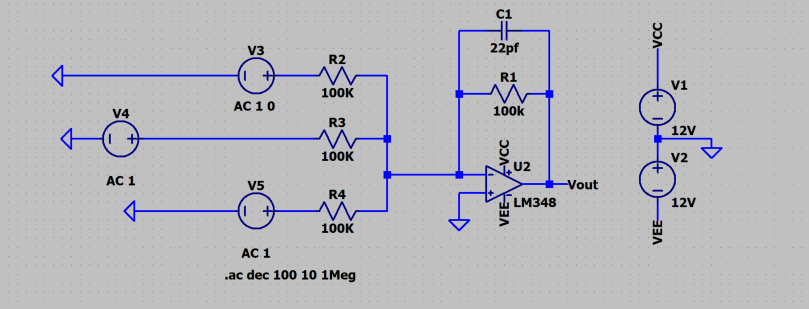

**Summing Low pass with C= 22 Pf, -3dB frequency is about 62 KHz**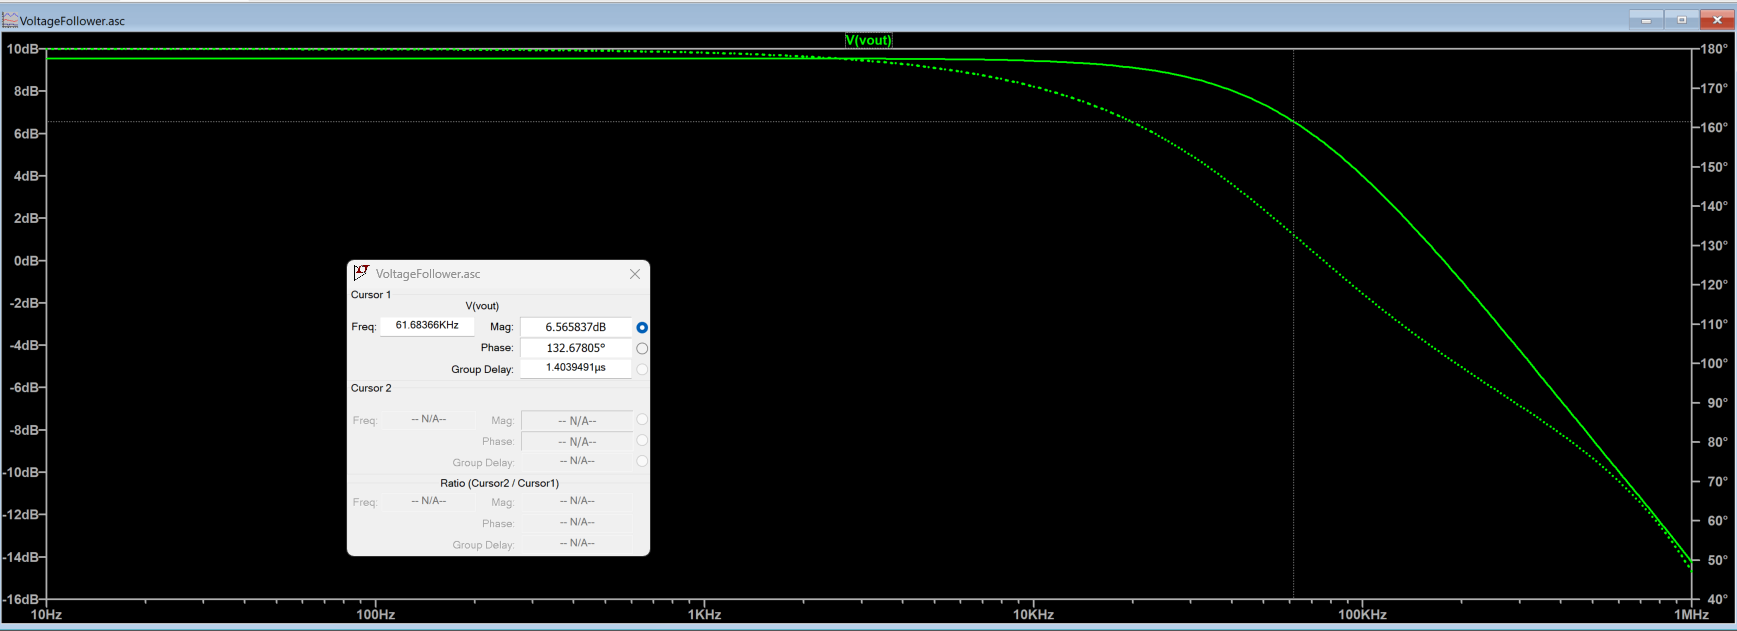

**Summing Low pass Opamp with C = 1 nF, for Lower Cutoff Frequency** 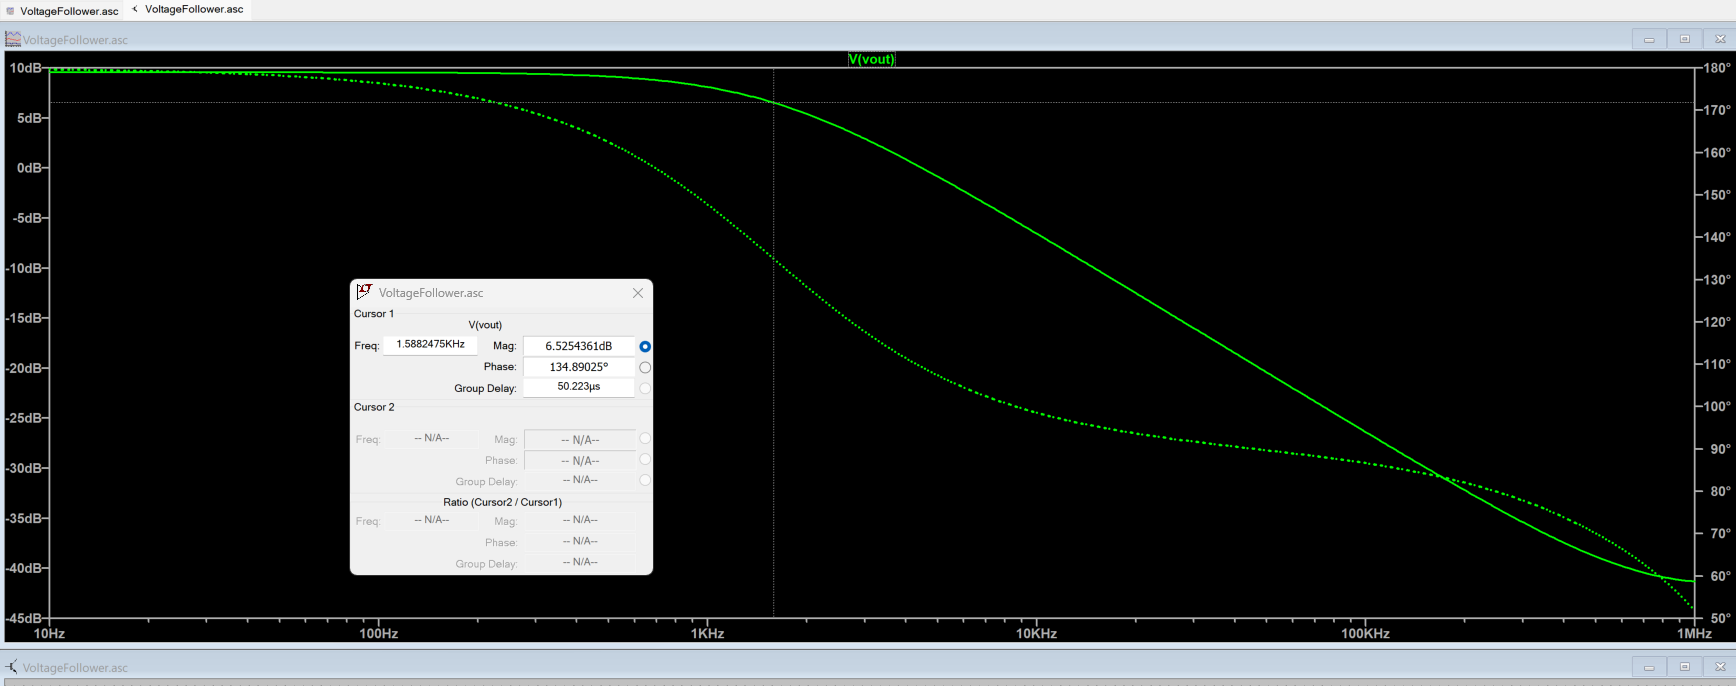


**Purpose of Summing Low-Pass Filter Analysis:**
This analysis demonstrates how a summing amplifier with a feedback capacitor can function as an audio mixer that selectively attenuates high-frequency noise while preserving desired audio signals. AC analysis is used to identify the cutoff frequency of the circuit, while transient and listening tests illustrate how high-frequency components affect the output waveform and perceived sound quality. By modifying the feedback capacitor, the cutoff frequency is shifted to more effectively suppress unwanted high-frequency content, highlighting the practical role of filters in real-world audio systems.  

This analysis shows how frequency-domain filtering, not just gain scaling, is essential for controlling noise in real audio mixers.


#**Procedure-3 Preamplifier**
**Analysis 1: PreAmp without Shunt Resistance**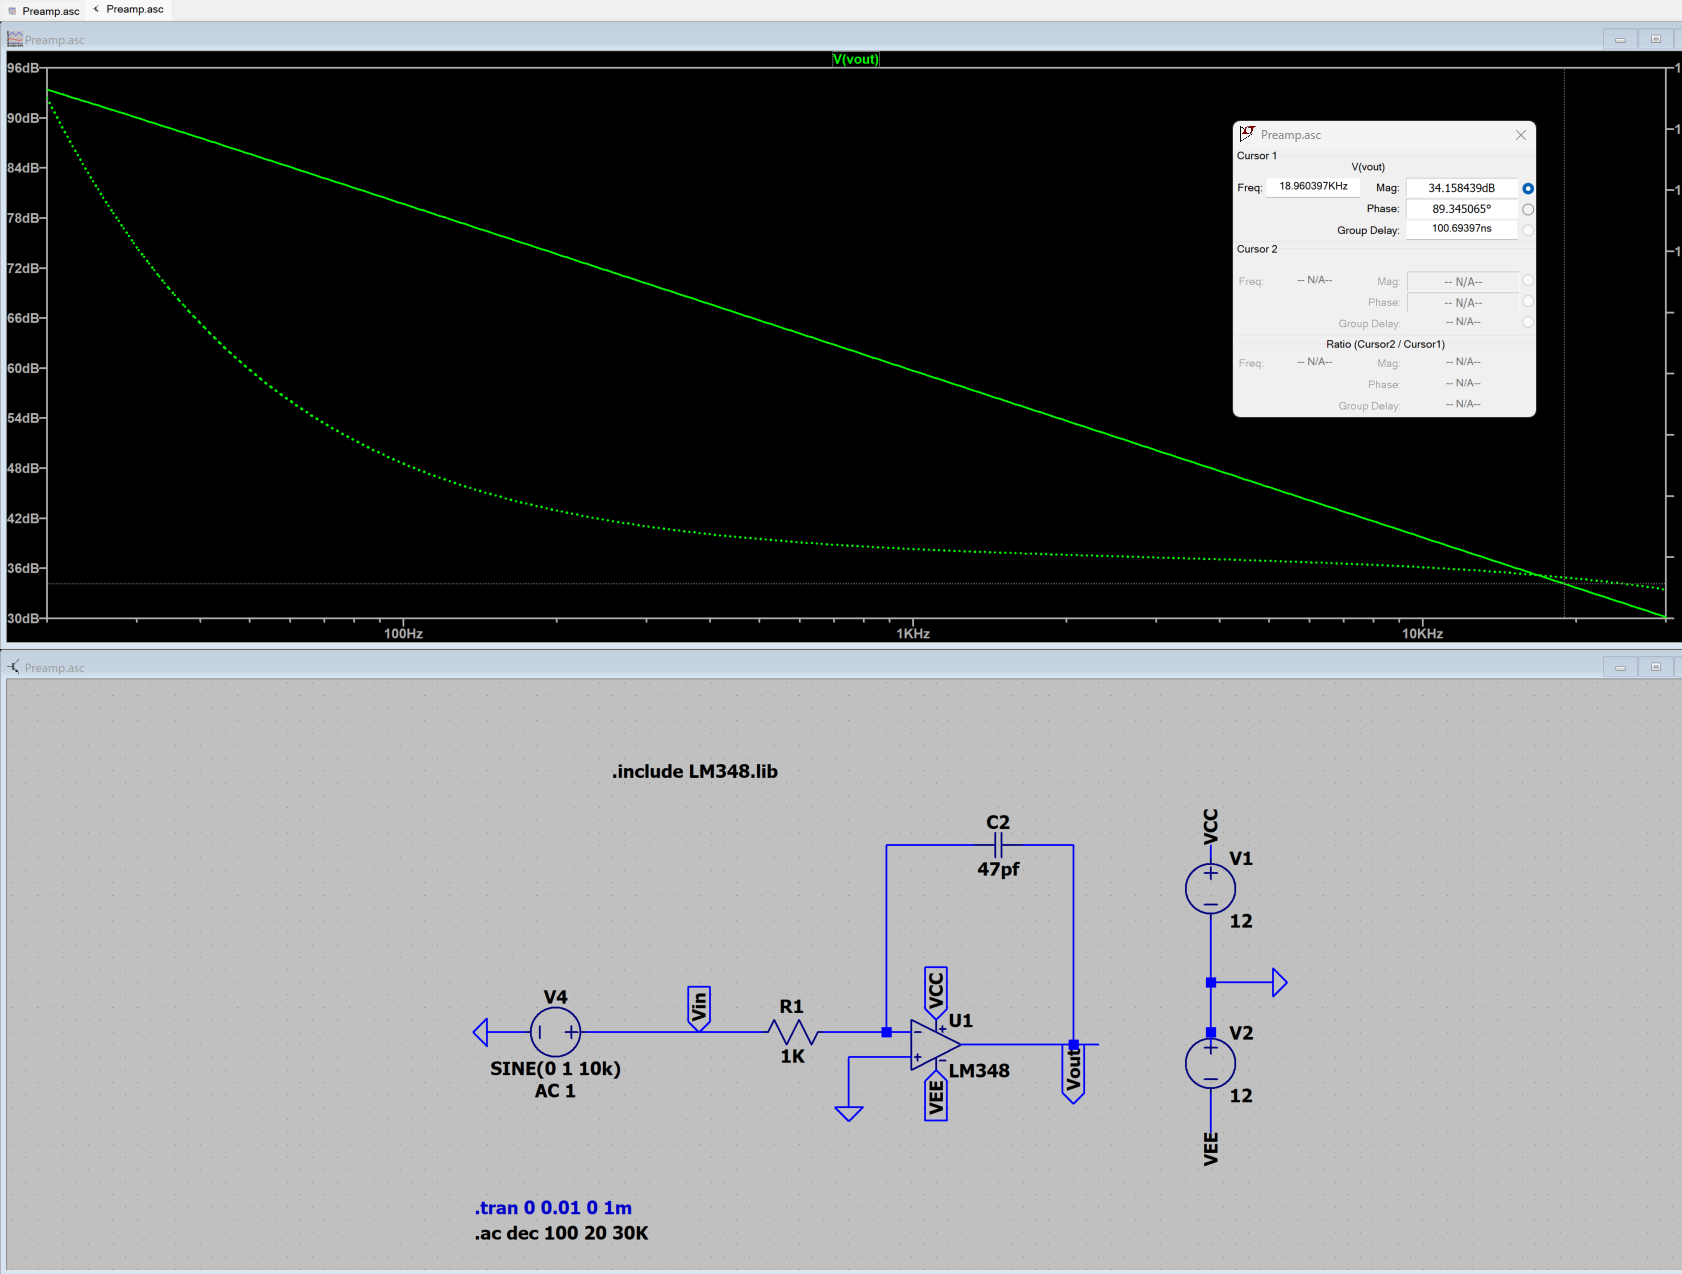

When the resistor in parallel with the feedback capacitor is removed, the circuit no longer behaves as a low-pass filter but instead functions as a pure integrator. In this configuration, the gain decreases continuously with frequency and there is no defined passband or cutoff frequency. Additionally, the lack of a DC feedback path causes the circuit to amplify offsets and noise, leading to output drift and instability. For this reason, a parallel resistor is required to realize a stable and practical low-pass filter for audio applications.

Without the resistor, the feedback capacitor forces the circuit to behave as an integrator rather than a low-pass filter.

**Analysis 2:  PreAmp with Shunt Resistance** 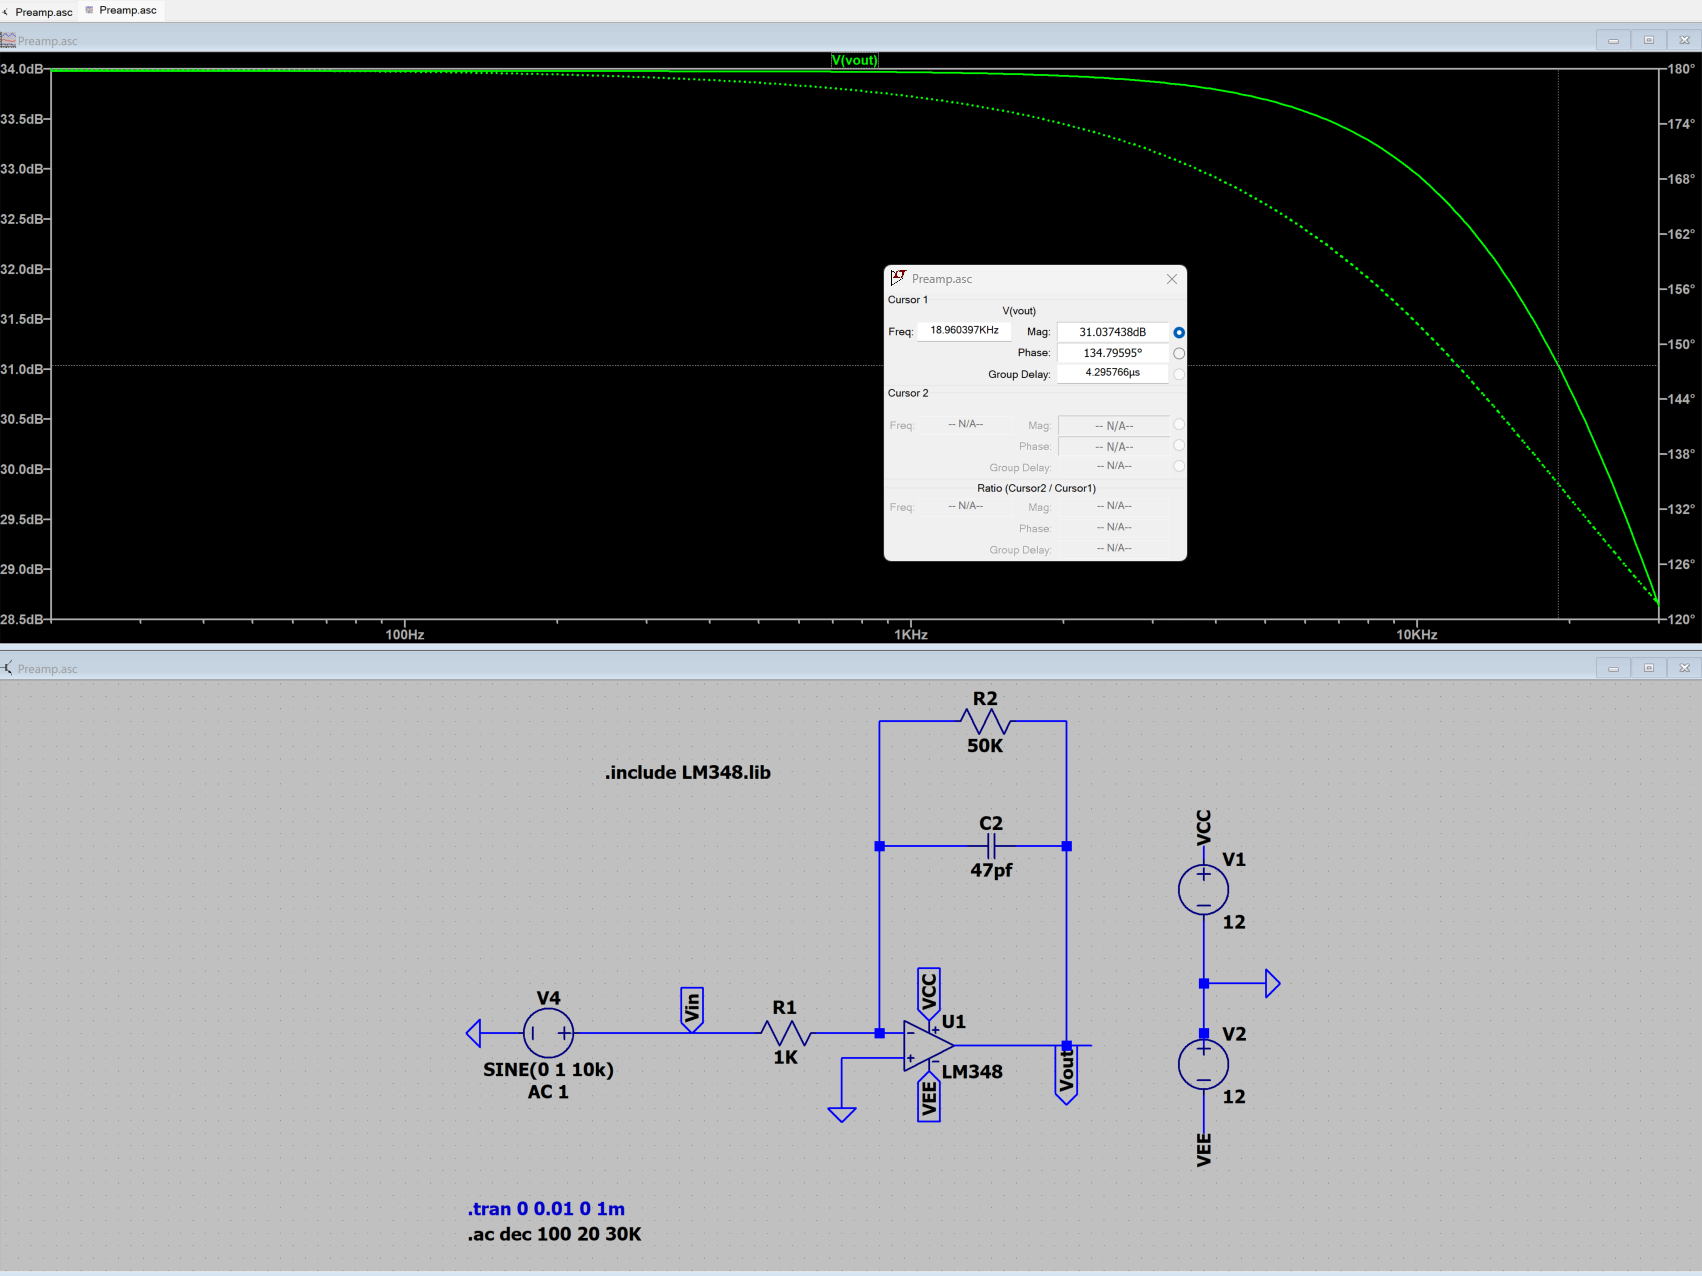

When a resistor is placed in parallel with the feedback capacitor, the op-amp circuit forms a first-order active low-pass filter with a well-defined frequency response. At low frequencies, the capacitor presents a high impedance, and the feedback path is dominated by the resistor, resulting in a constant and finite closed-loop gain. As frequency increases, the impedance of the capacitor decreases, increasing the amount of negative feedback and causing the gain to roll off at a rate of –20 dB per decade beyond the cutoff frequency.

The cutoff frequency of the filter is determined by the parallel resistor and capacitor according to

𝑓𝑐 = 1/(2pi)RC​


This configuration ensures a stable DC operating point, prevents excessive low-frequency gain, and produces a predictable passband suitable for audio applications. The parallel resistor is therefore necessary to convert the circuit from an integrator into a practical low-pass filter that maintains flat gain across the desired frequency range while attenuating high-frequency noise.



The addition of a resistor in parallel with the feedback capacitor creates a first-order active low-pass filter with a defined cutoff frequency and stable low-frequency gain, making it suitable for audio signal conditioning.

#**Procedure-4 Summing Differential Amplifier**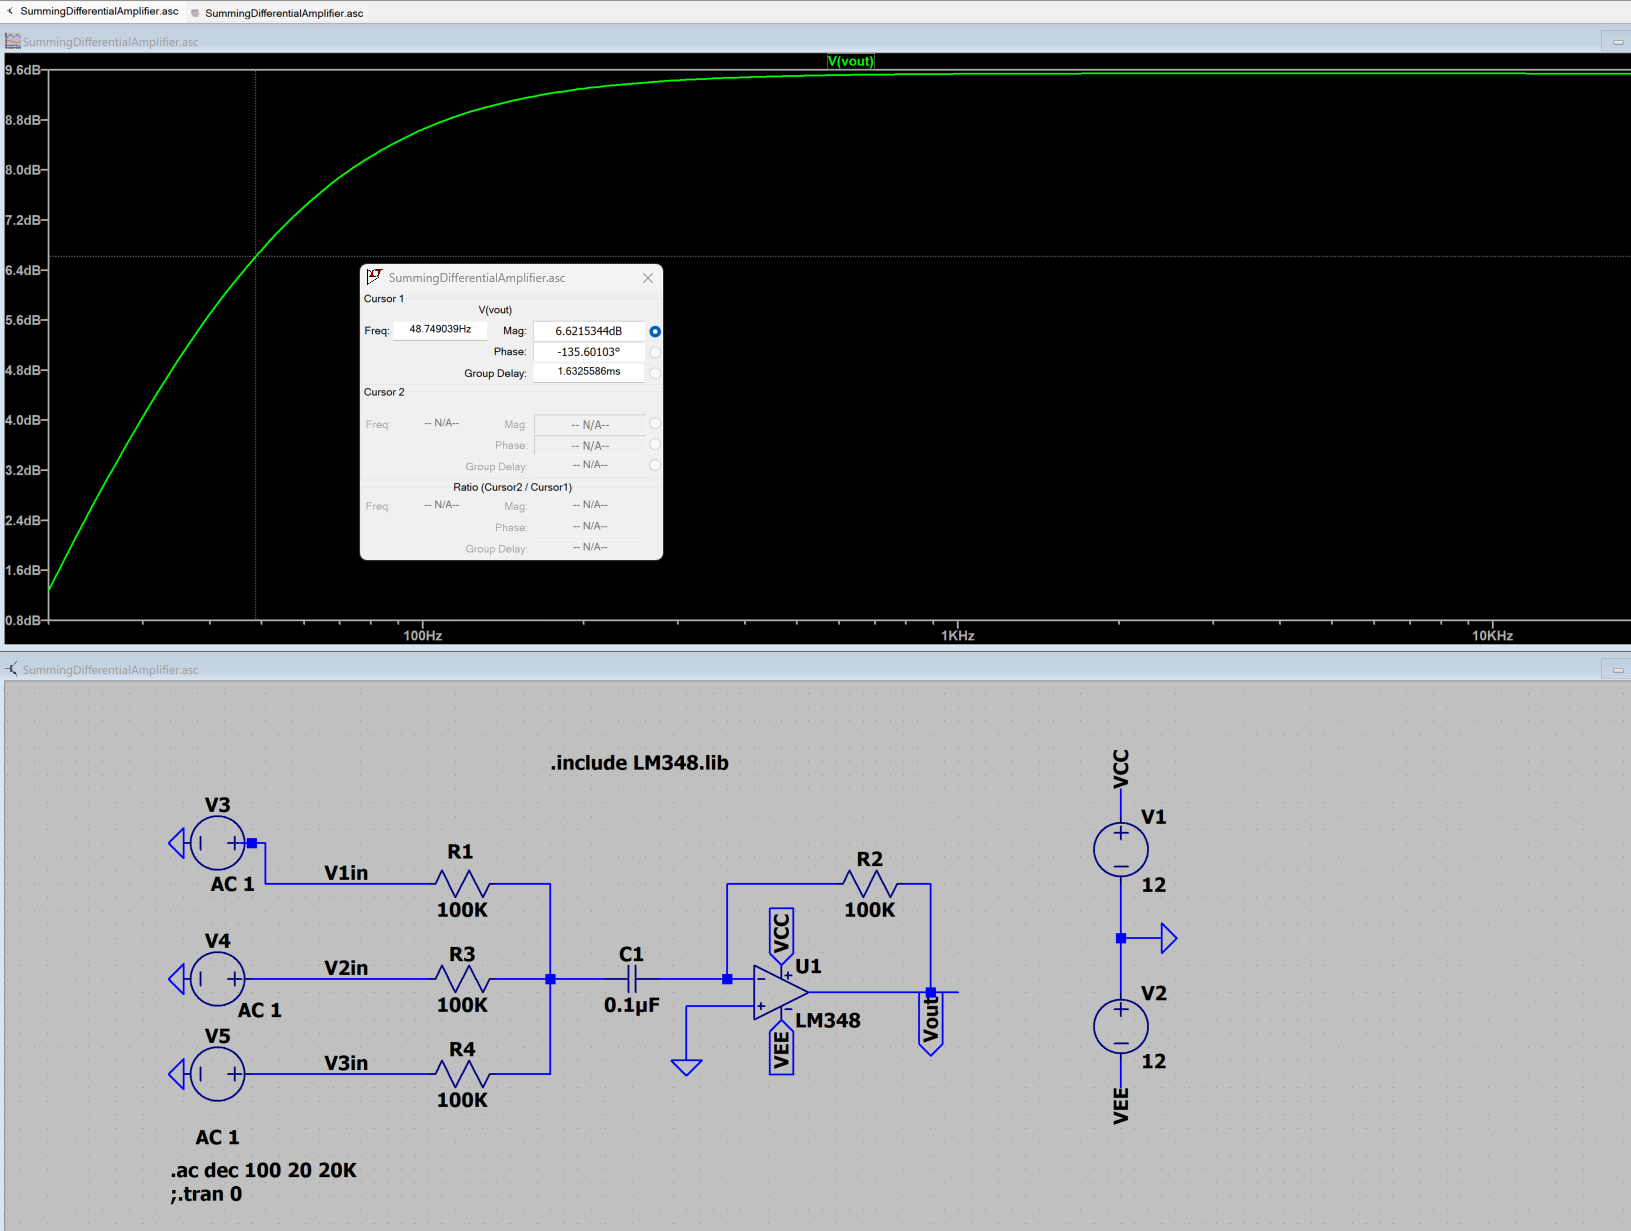

#**Procedure-5 Equalizer**
**Analysis 1: Testing 3 center frequencies for maximum band-pass gain**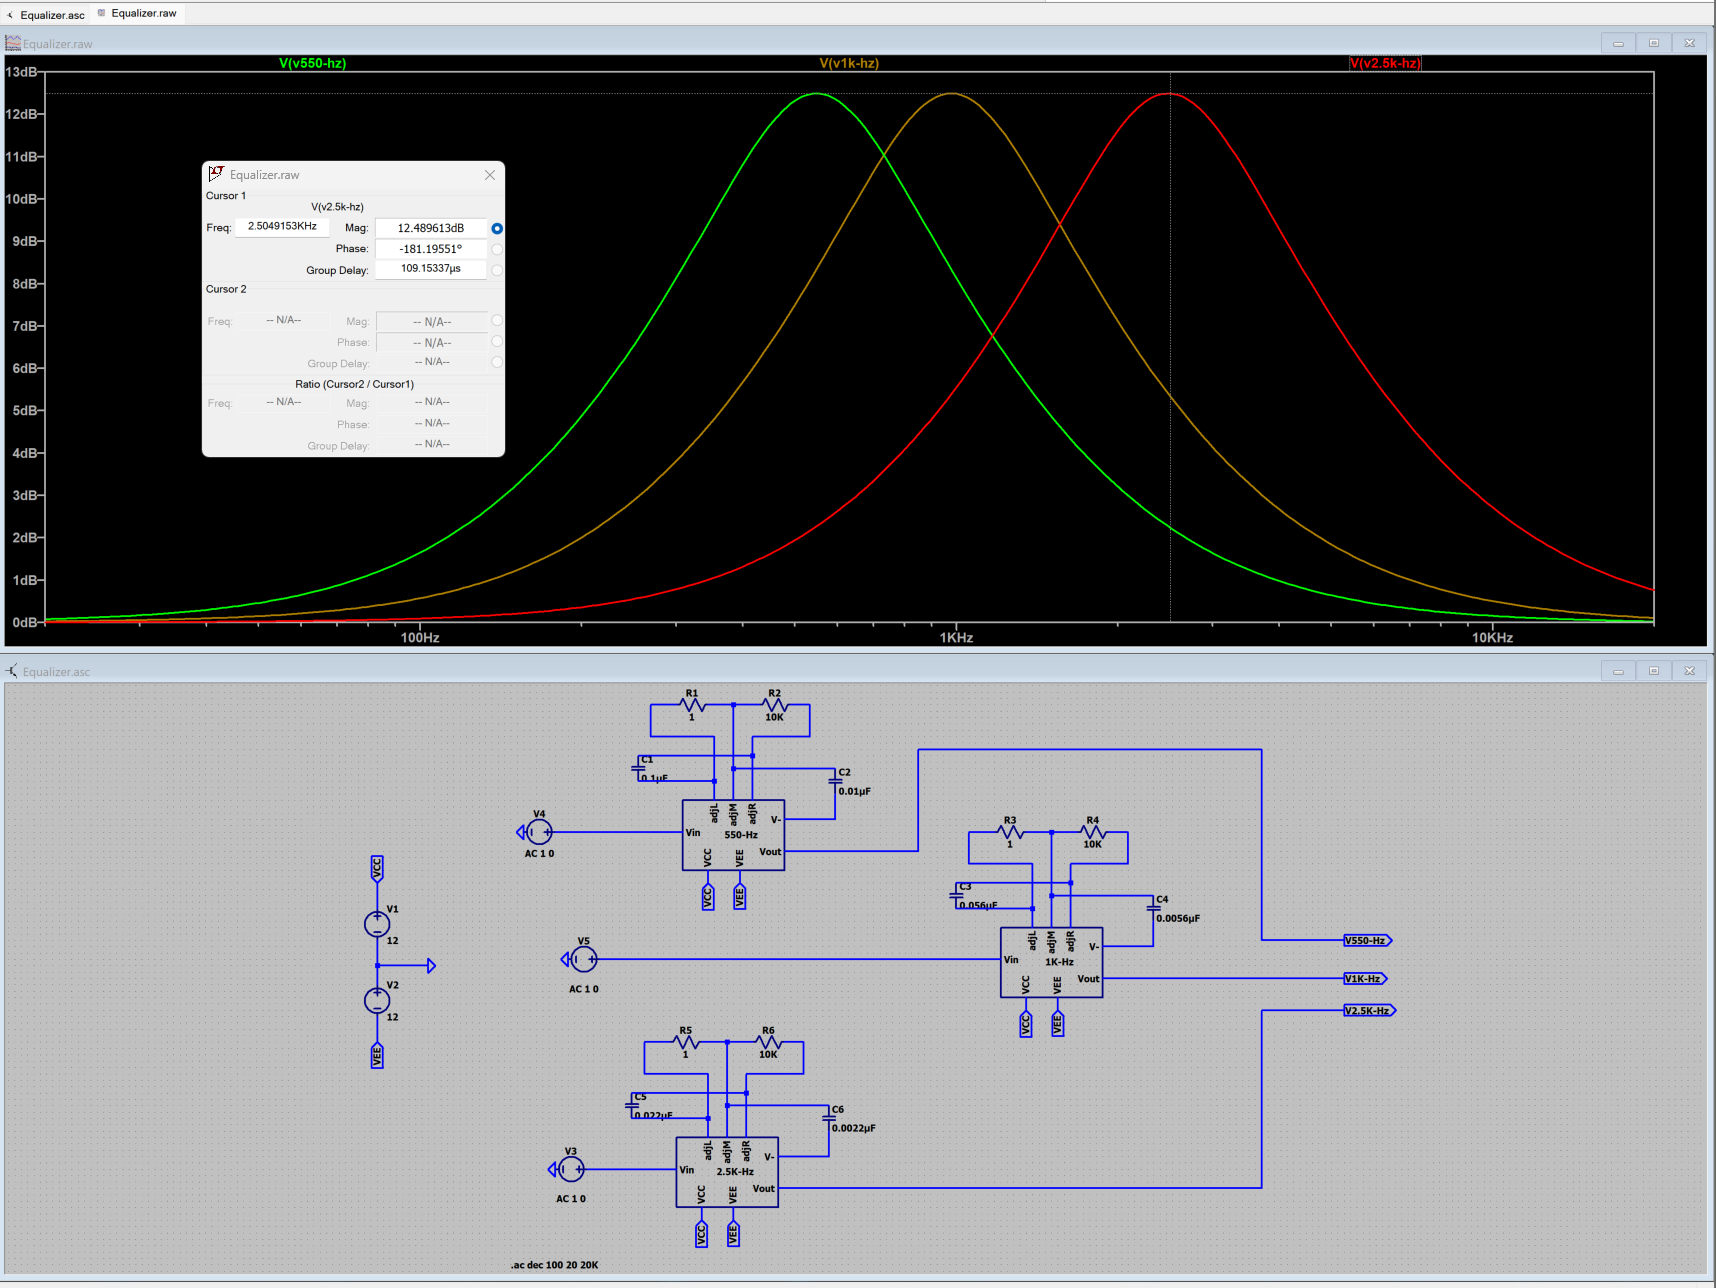

**Analysis 2: Setting 1K-Hz center frequency to band reject**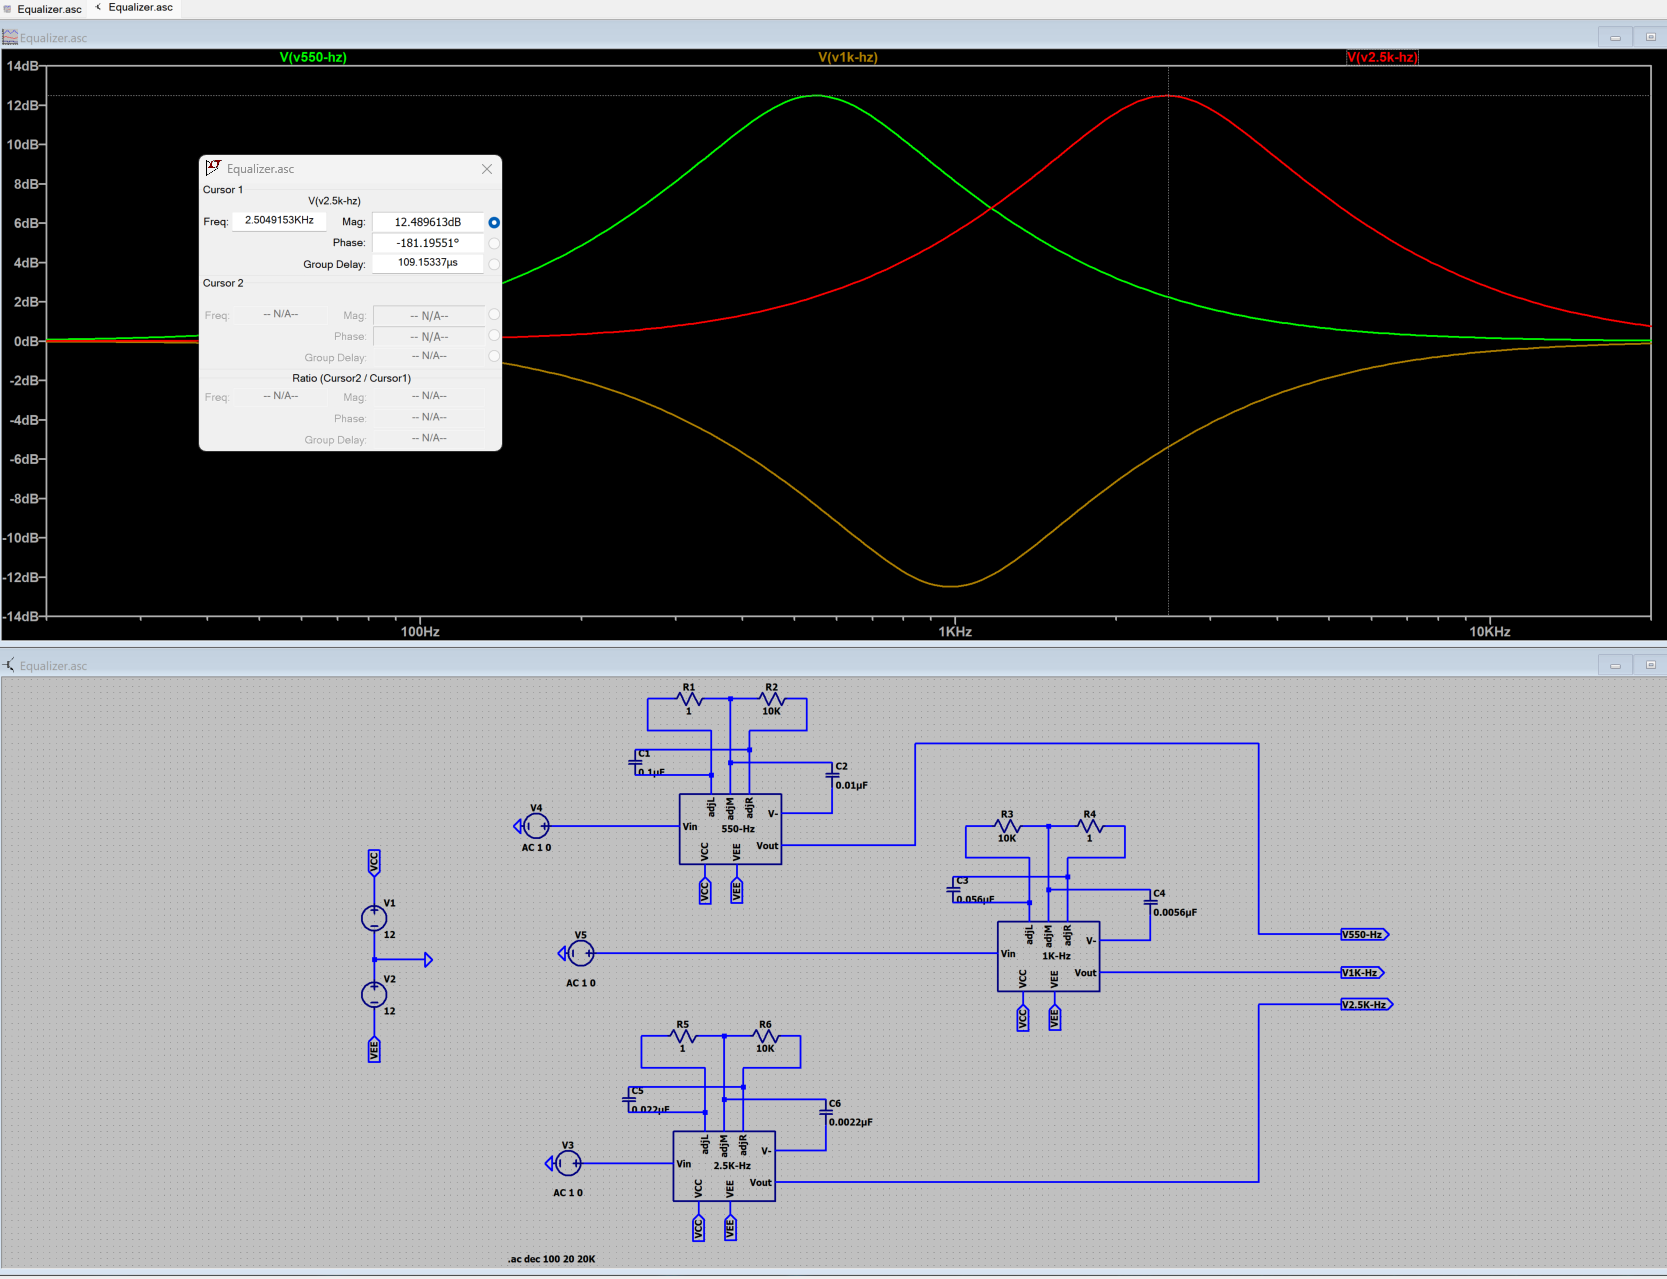

**Analysis 3: Adding 3 output of Equalizer without Summing-Amplifier**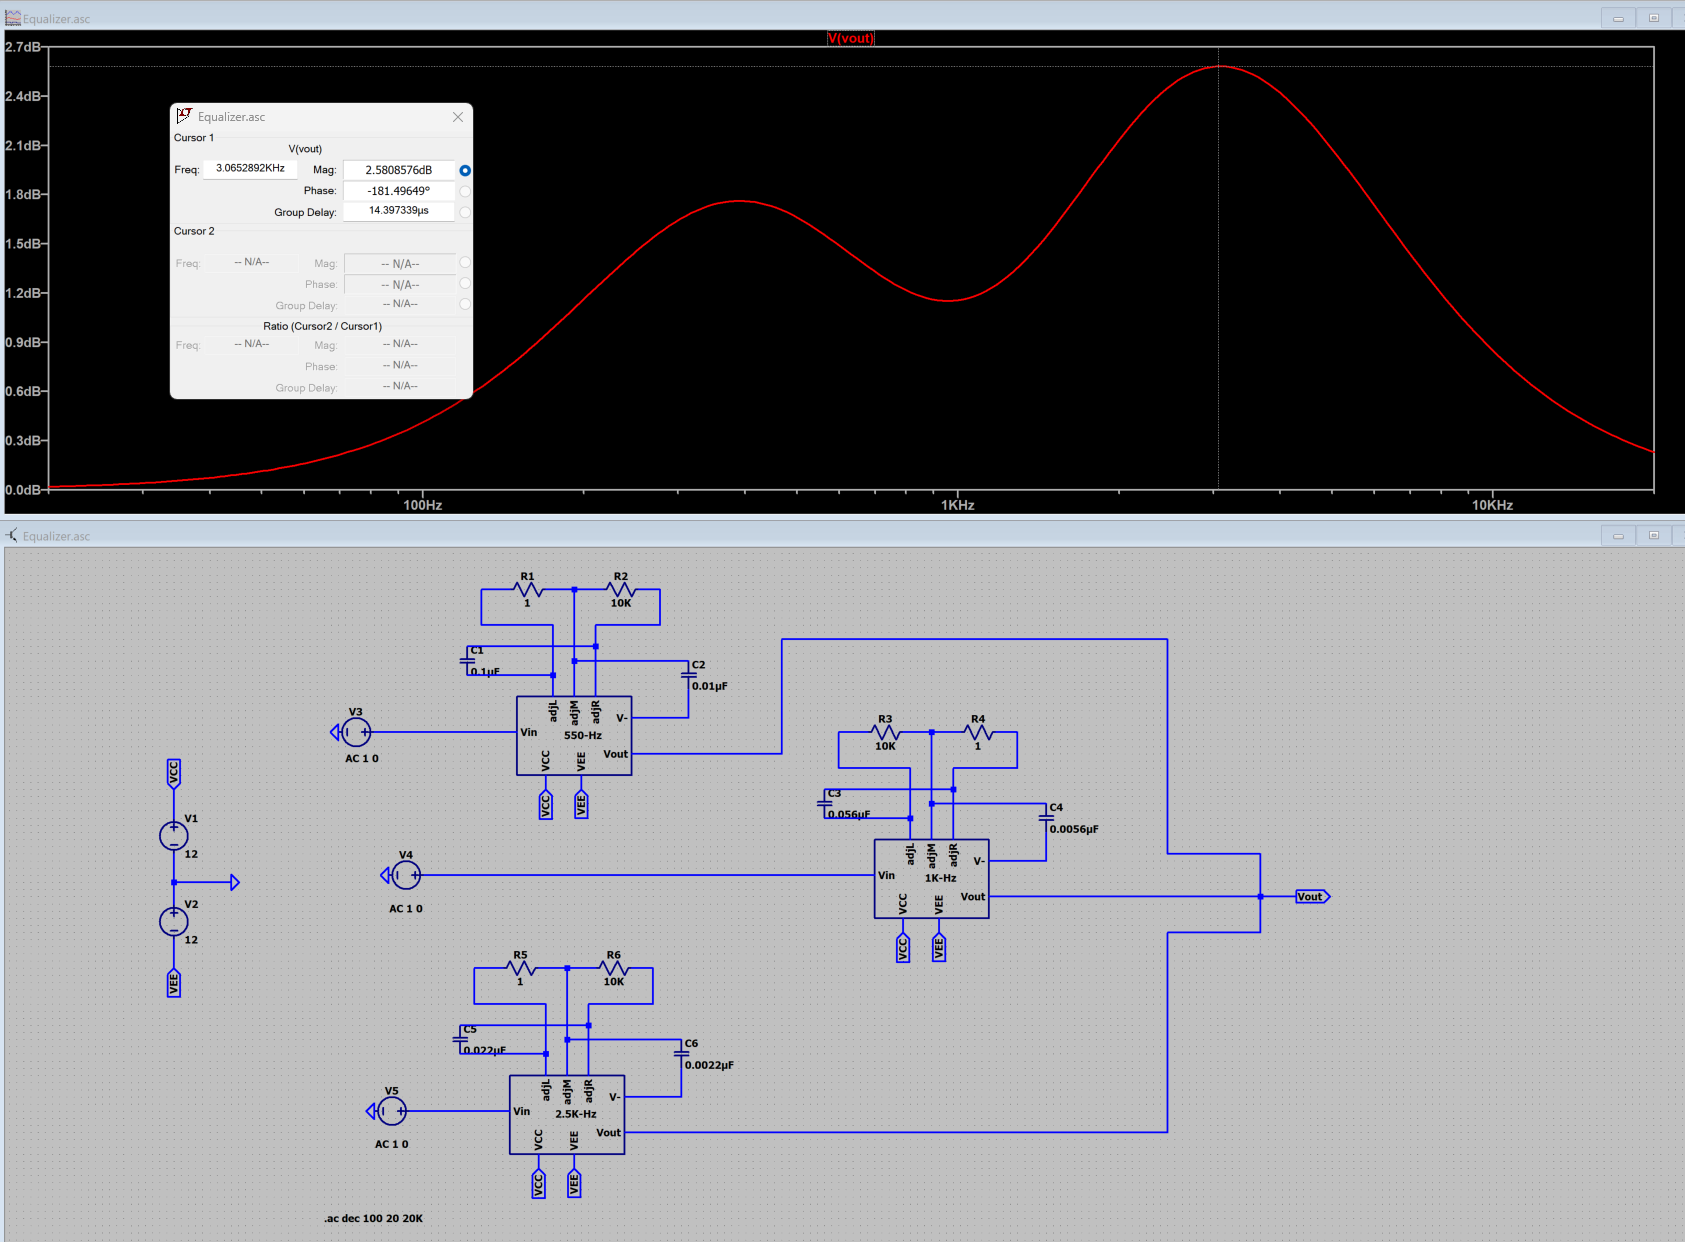


**Analysis 4: Adding three output of Equalizer with Summing Amplifier**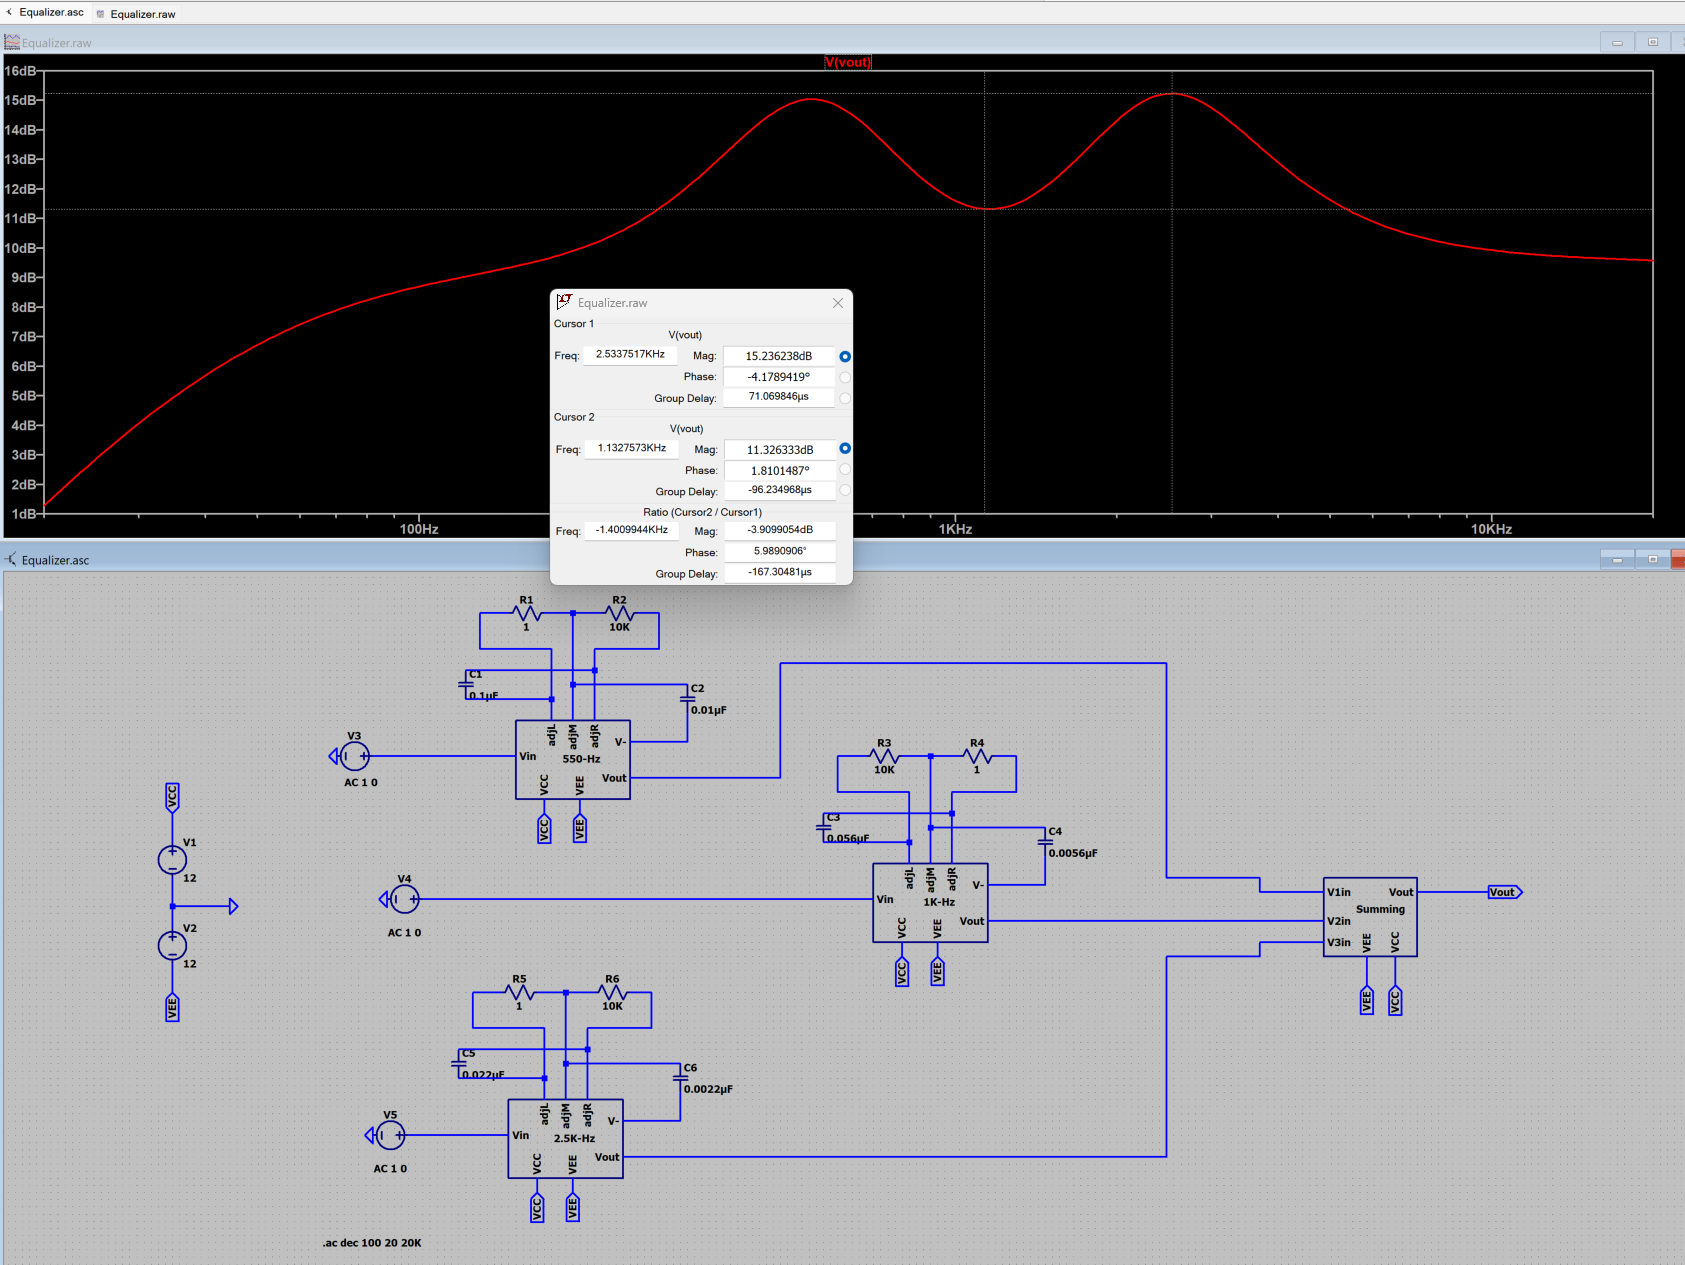

**Summing Amplifier Conclusion Note**

Note: Impact of Using a Summing Amplifier on Frequency and Magnitude

In this analysis, we initially observed that directly summing multiple filter outputs without a dedicated summing stage led to noticeable shifts in center frequencies and a reduction in magnitude. This happened because the filters were interacting directly, causing loading effects and phase differences that altered the combined response.

By introducing a proper summing amplifier, we effectively isolated each filter stage and created a virtual ground at the summing node. This prevented the filters from loading each other and ensured that each band’s center frequency remained stable. As a result, the original center frequencies were preserved, and the overall magnitude was maintained or even slightly increased due to proper summation.

In summary, using a summing amplifier is the correct approach for this audio mixer. It ensures that the frequency response remains balanced and that the combined output accurately reflects the intended contributions of each input signal without unintended shifts or attenuation.

**Analysis 5:
Set all equalizer section potentiometers to 50%. This will remove the band-pass/band-reject
components and expose the high-pass filter response portion only (from the differential summing
amplifier)** 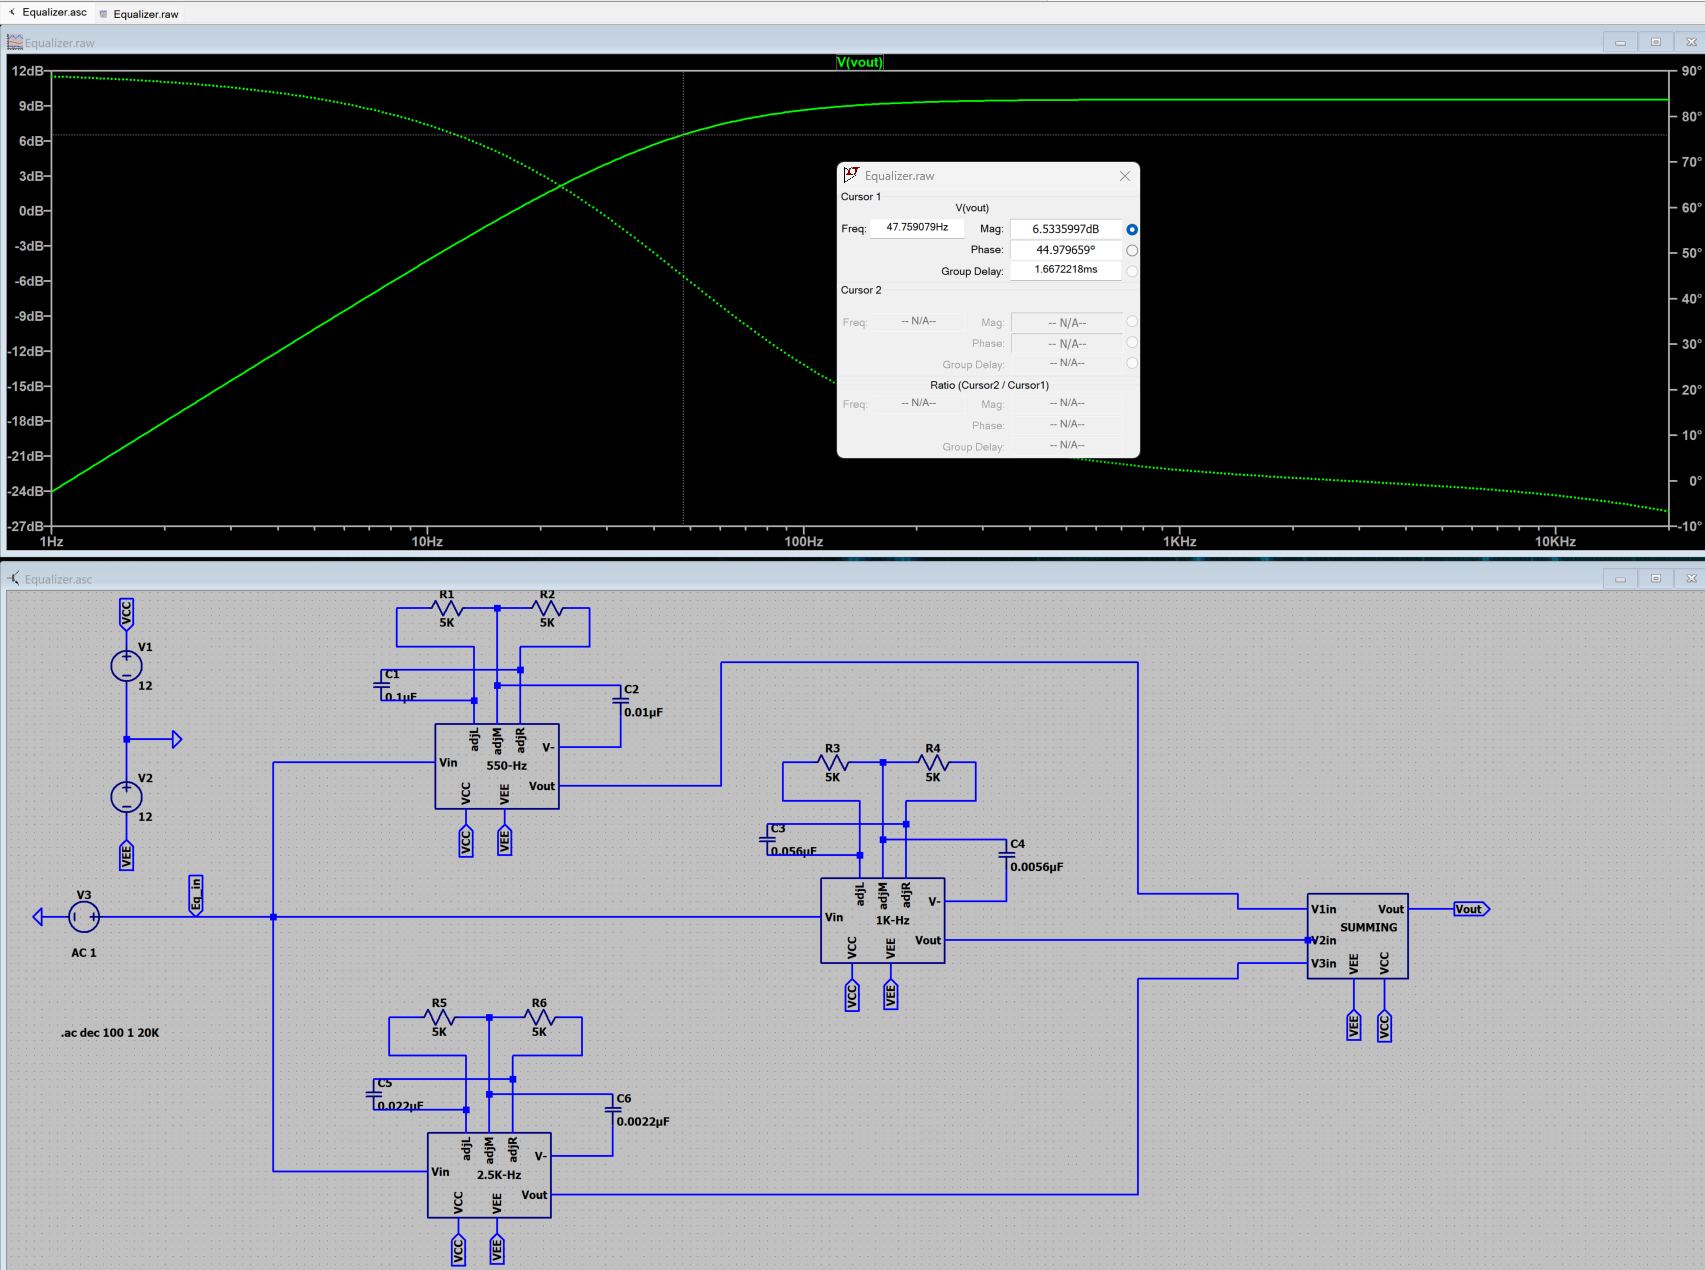

#**Procedure 6 – Audio Mixer Final Stage:**
We are now ready to put together the entire audio mixer. We’ll assume we have 3 input sources and will
first want to perform amplification and low-pass filtering with preamps, then sum them and forward the
combined signal through our equalizer. This final stage is the block diagram shown on the begining of the project.

**Analysis 1:**
To examine the frequency response of the mixer for audio signals, I set inputs Vin2 = Vin3 = 0 and
ensure the 550 Hz and 2.5 kHz equalizer sections are set for maximum band-pass gain, and the 1 kHz
equalizer section is set for minimum band-reject gain. Run an AC sweep for the gain Vout/Vin1 from
20 Hz to 20 kHz 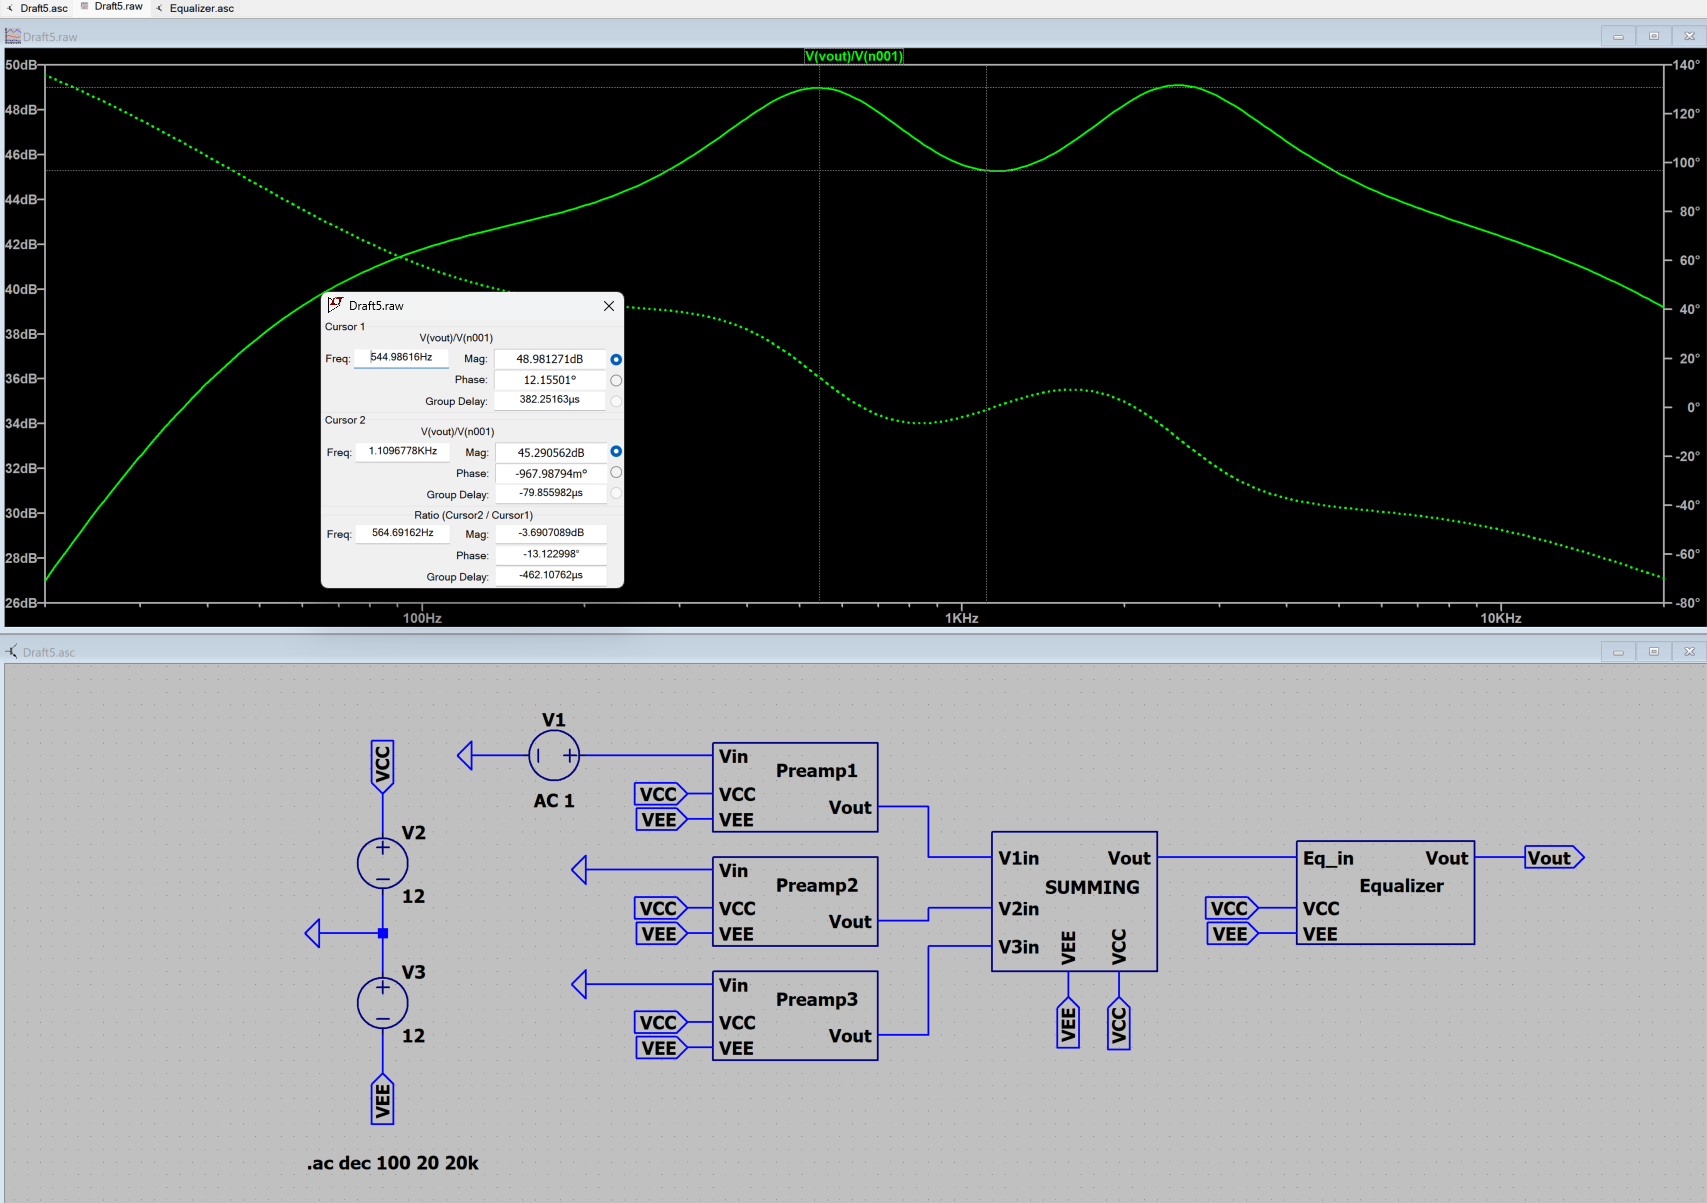

**Analysis 2:**

So far, we have not really addressed the effect of phase response in practicality. Recall that phase response means that at a particular frequency, a signal will be phase shifted by a certain amount. This
translates into an effective shift in time depending on the frequency of the signal.
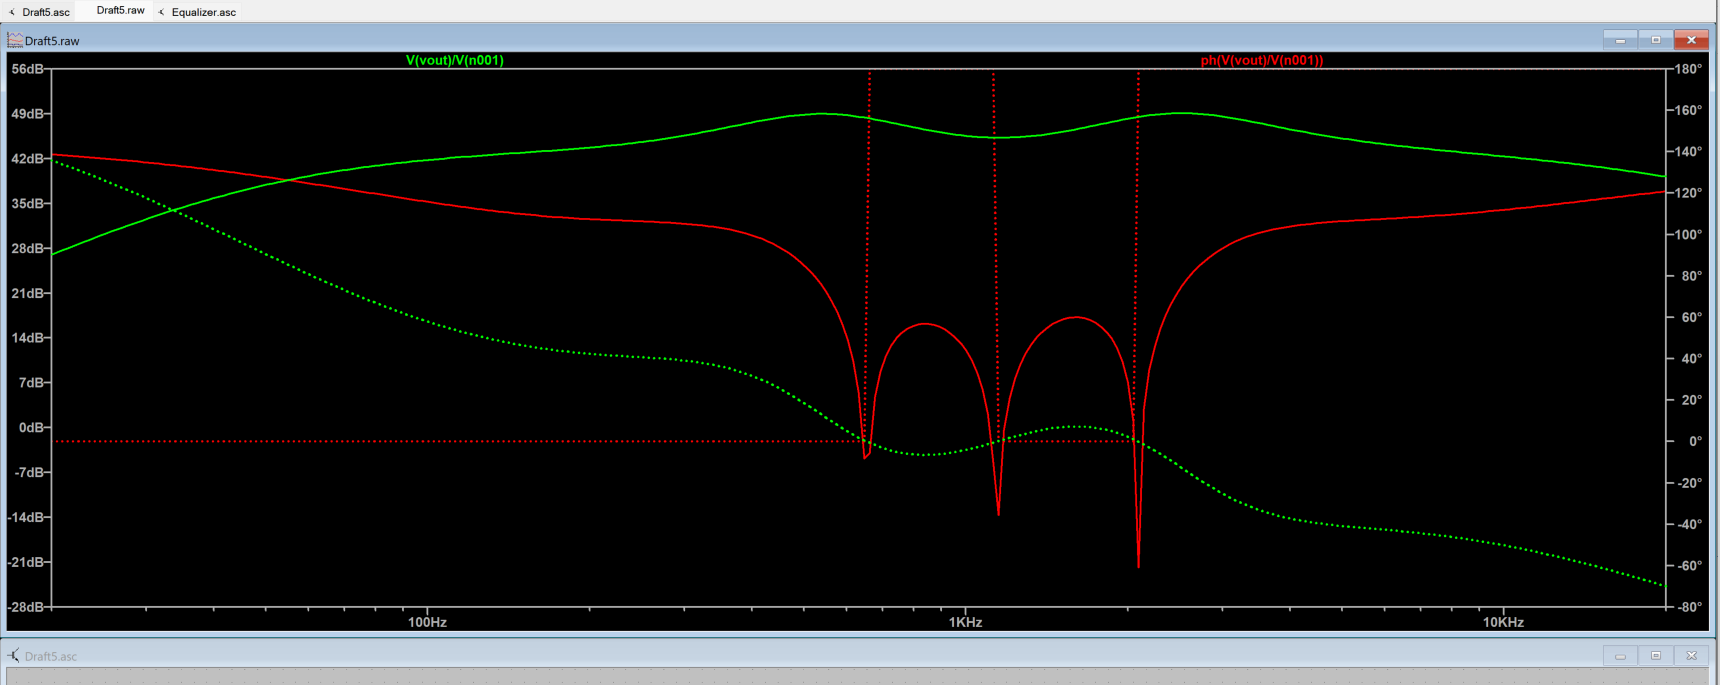

**Phase Response Interpretation**

(a) Ideal phase response for no distortion

Audio signals consist of many frequency components occurring simultaneously. To preserve the waveform shape of such signals (i.e., avoid phase distortion), the ideal phase response of an audio mixer would be linear with frequency. A linear phase response corresponds to a constant group delay, meaning that all frequency components experience the same time delay as they pass through the system. In this ideal case, the mixer would only affect the amplitude of the signal while preserving its original waveform shape.

(b) Audibility of phase distortion in this mixer

The simulated phase response of the audio mixer is not perfectly linear; instead, it exhibits frequency-dependent phase shifts, particularly around the equalizer band centers. This behavior is typical of active filter networks and indicates that different frequency components experience slightly different time delays.

However, based on the overall phase response and the corresponding group delay values (on the order of tens to a few hundred microseconds across the 100 Hz to 8 kHz range), any phase-related distortion is expected to be well below the threshold of human perception. These delays are significantly smaller than those introduced by typical loudspeakers and room acoustics, which are often several milliseconds. Therefore, while the mixer is not perfectly phase-linear, the phase distortion introduced by the circuit is unlikely to be perceptible when playing typical music.

**Summary Statement**

Although the mixer exhibits a non-linear phase response, the resulting time delays are small and smoothly varying. As a result, the phase response is sufficient for practical audio applications and does not introduce audible distortion under normal listening conditions.




**Analysis 3:**
To examine the transient response, setting the 550 Hz and 2.5 kHz equalizer sections are set for maximum band-pass gain, and the 1 kHz equalizer section is set for minimum band-reject gain. Then, setting inputs Vin1 = 10 mV 550 Hz sine, Vin2 = 10 mV 1 kHz sine, and Vin3 = 10 mV 2.5 kHz sine.
These amplitudes represent typical microphone output voltages. We can see the wave well-forned, there is no clipping.
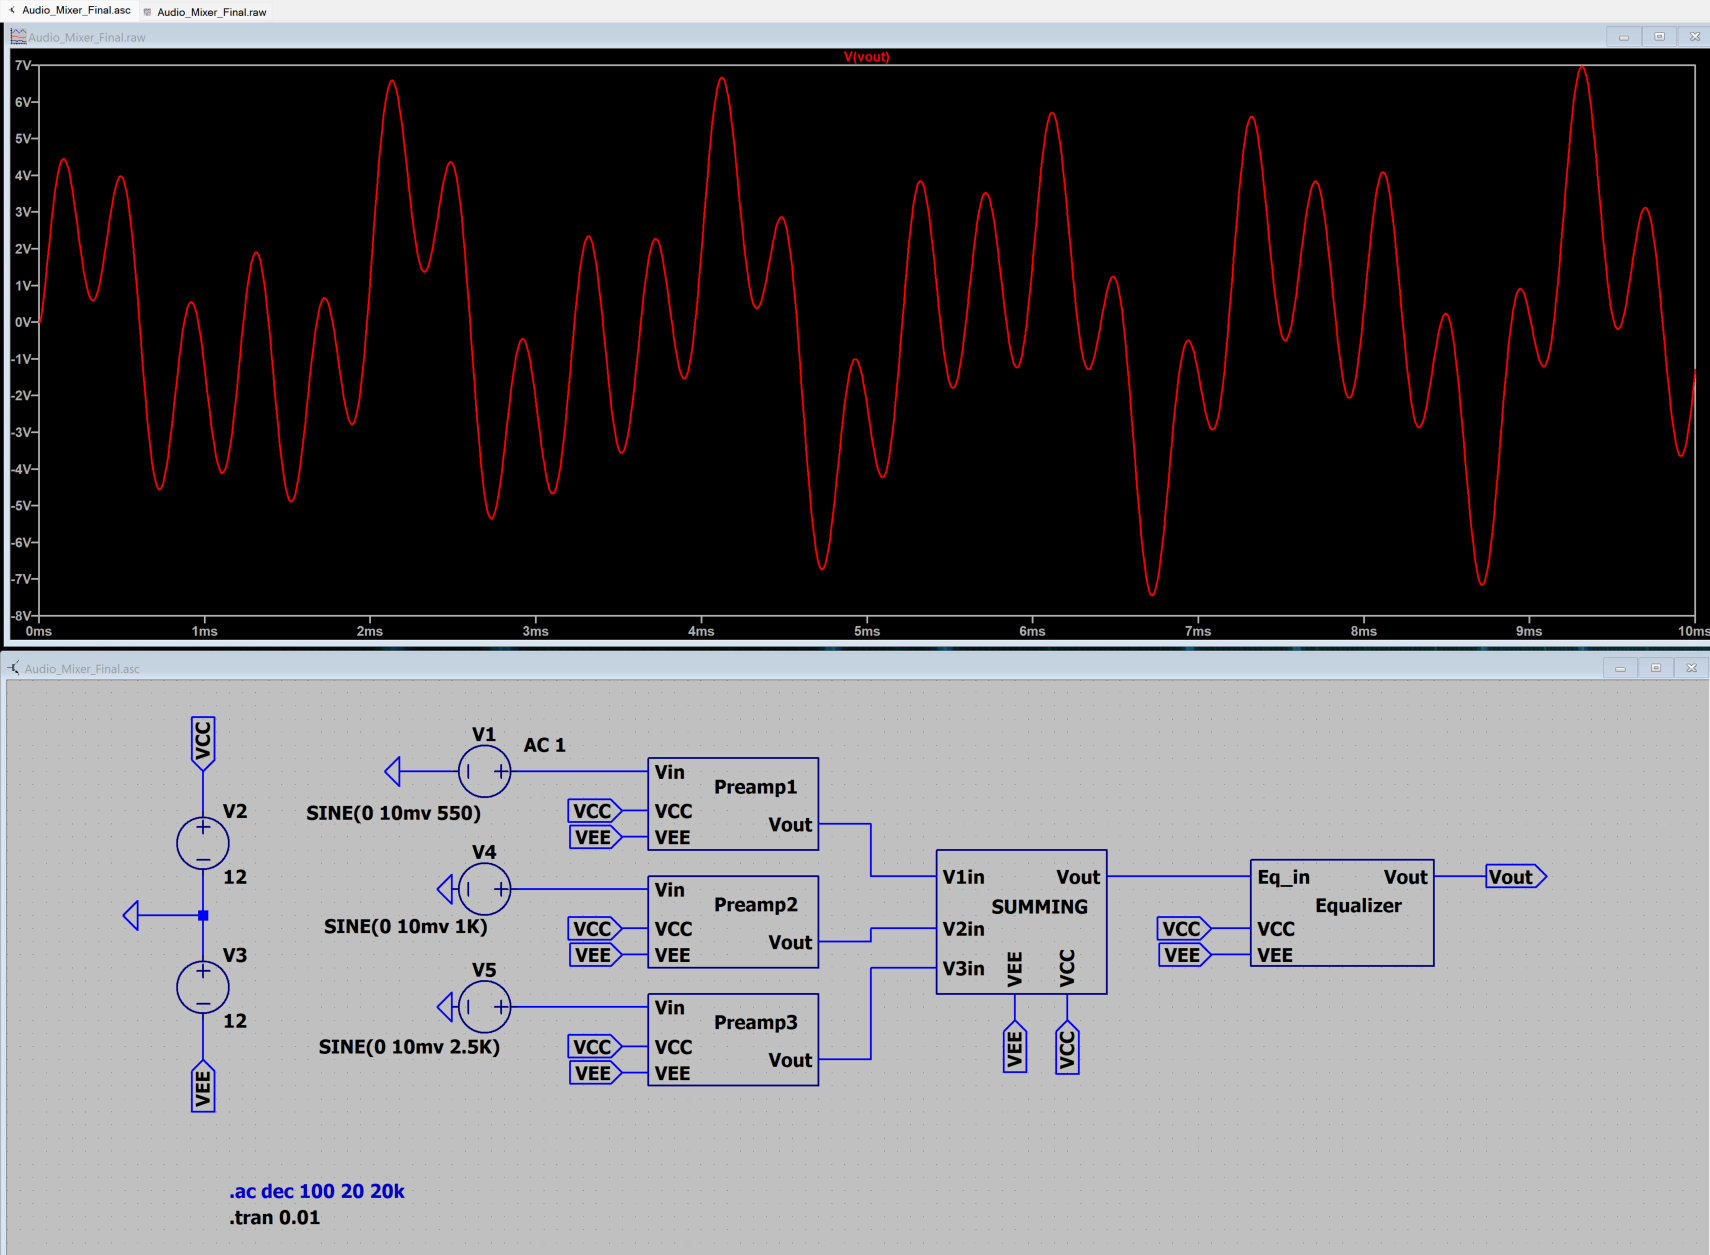

**Analysis 4:**
we’ll put this circuit to a realistic test by
adding a load. Standard earbuds, for example, have an impedance of 25 Ω. Can our audio mixer power a
standard earbud on its own?
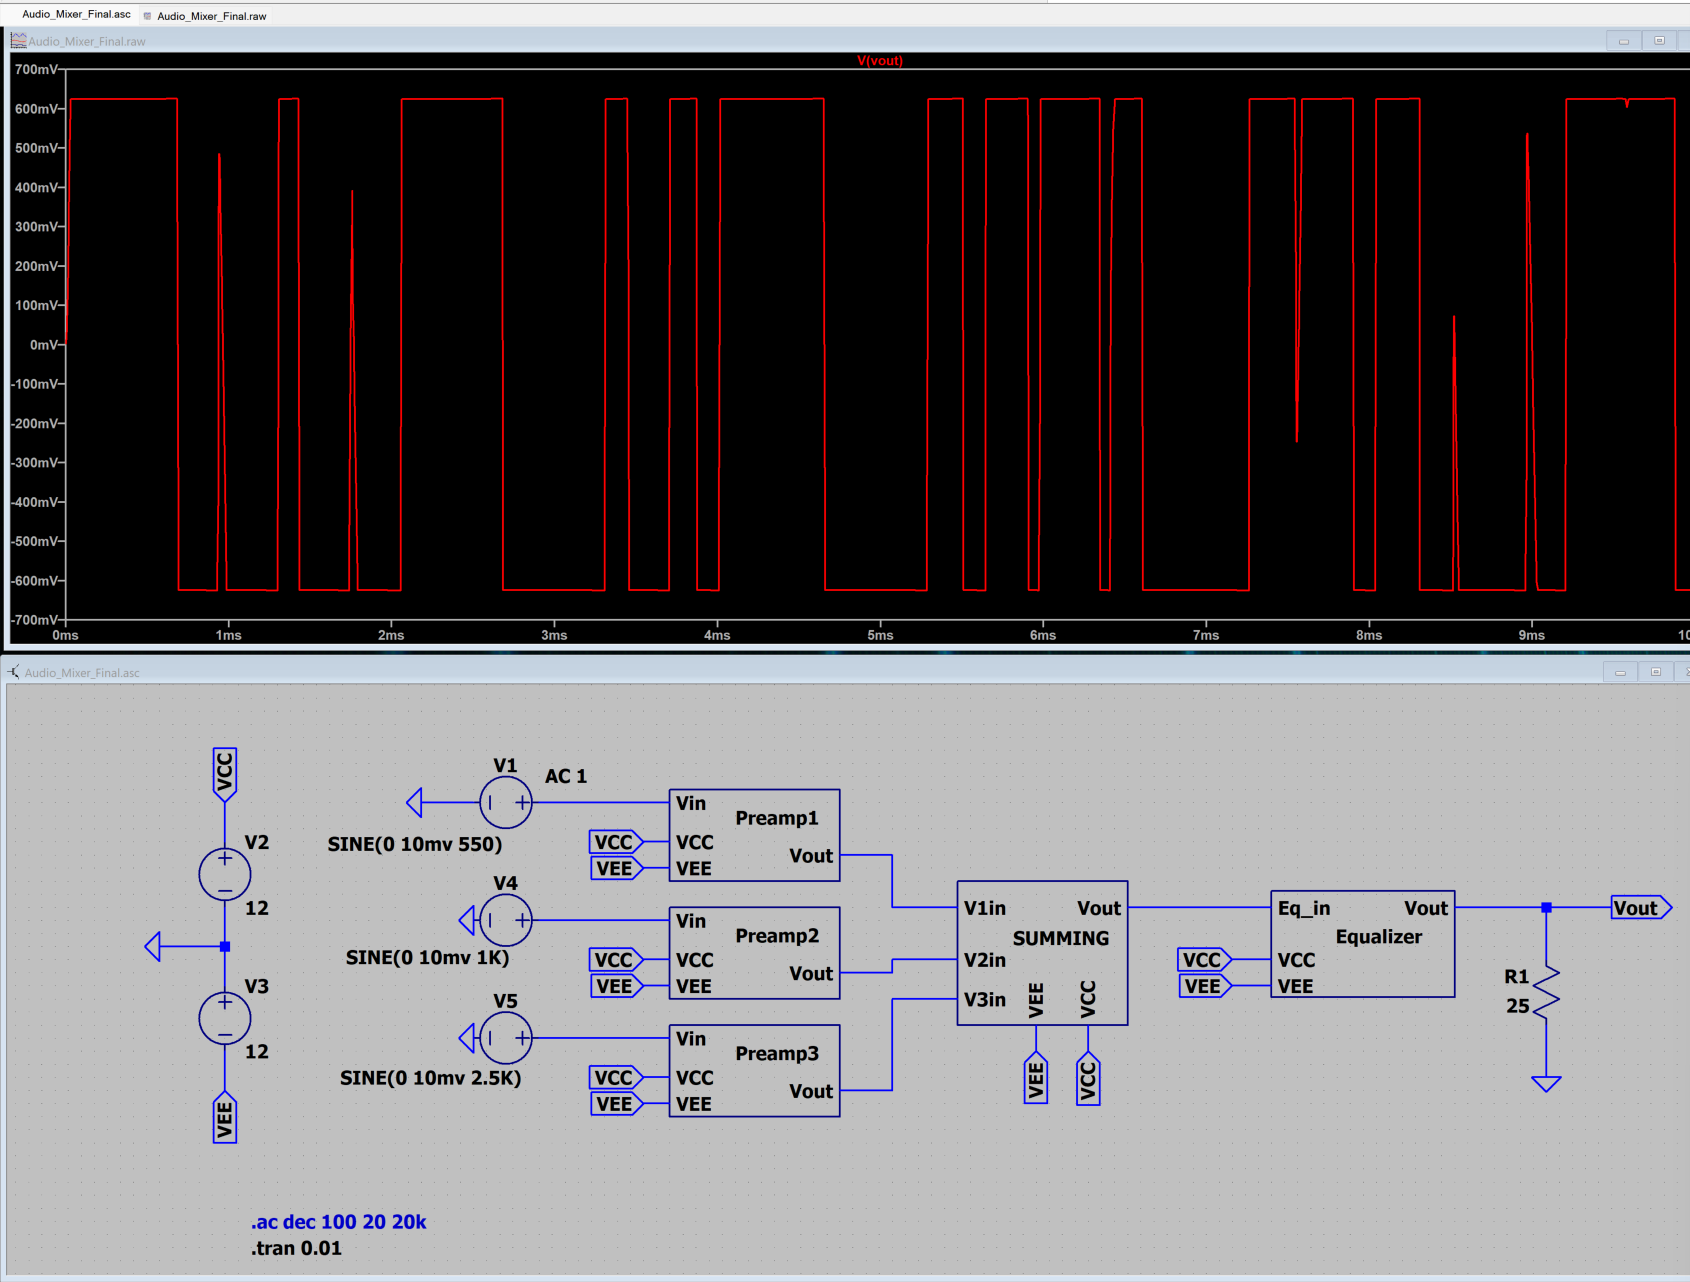

There is a lot of distortion and the voltage is limited to about +-700 mV in magnitude. It turns out that while our audio mixer does exhibit our desired frequency response, it has a lot of trouble actually powering realistic loads. A high-level reason for this is because op-amps are good voltage amplifiers but not good power amplifiers. A load that tries to sink too much current can drastically affect the designed response of an op-amp circuit.
We can rectify this problem using power amplifiers built from
transistors. For example, we can recover the waveform and ‘fix’ our audio mixer to be able to power the 25 Ω earbud by adding a small circuit called a Class B Amplifier right before the output.

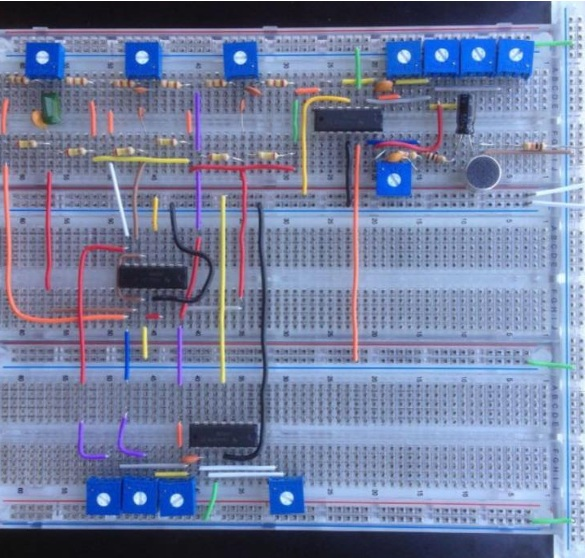